In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request, json 
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from matplotlib.dates import DateFormatter
import seaborn as sns 
import matplotlib as mpl
from matplotlib import rc,rcParams
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline 

In [2]:
date = pd.to_datetime("today").strftime('_%m_%d')
print('Latest update time is:',date)

Latest update time is: _07_14


In [3]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
#df['date'] = df['date'].dt.strftime('%m-%d')
df.iloc[0]['date']


Timestamp('2020-07-13 00:00:00')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7297 entries, 0 to 7296
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      7297 non-null   datetime64[ns]
 1   state                     7297 non-null   object        
 2   positive                  7282 non-null   float64       
 3   negative                  7141 non-null   float64       
 4   pending                   998 non-null    float64       
 5   hospitalizedCurrently     4688 non-null   float64       
 6   hospitalizedCumulative    3779 non-null   float64       
 7   inIcuCurrently            2399 non-null   float64       
 8   inIcuCumulative           1005 non-null   float64       
 9   onVentilatorCurrently     2101 non-null   float64       
 10  onVentilatorCumulative    354 non-null    float64       
 11  recovered                 4262 non-null   float64       
 12  dataQualityGrade    

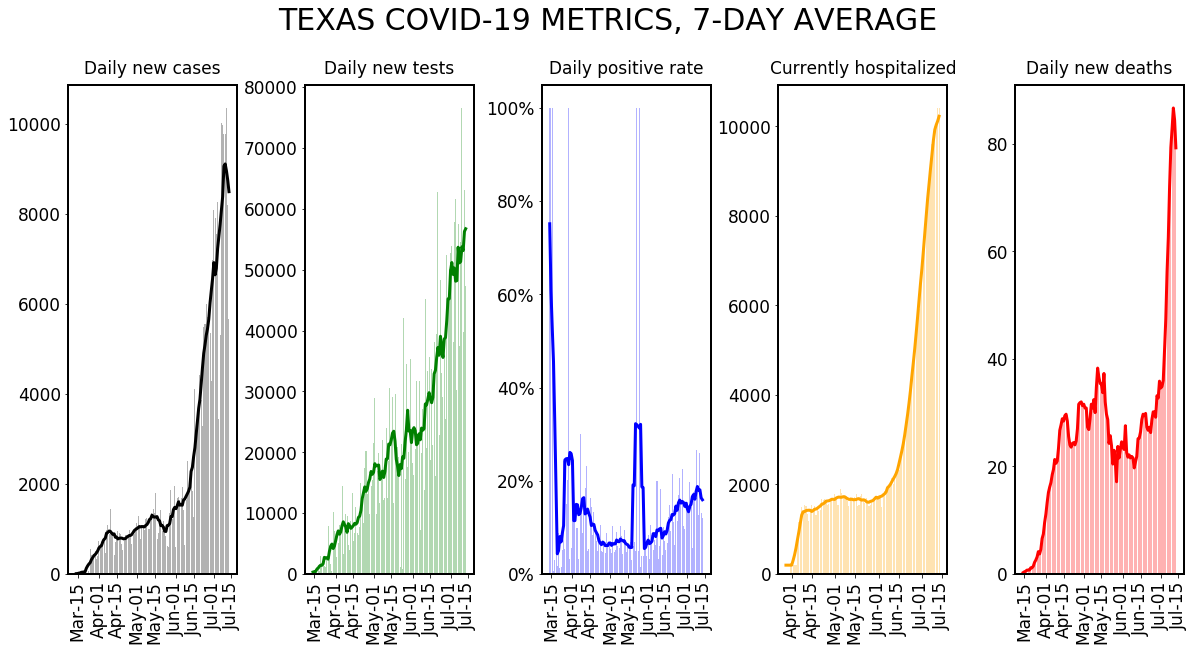

           date state  positive  negative  pending  hospitalizedCurrently  \
0    2020-07-13    AK    1539.0  145051.0      NaN                   22.0   
1    2020-07-13    AL   55545.0  464059.0      NaN                 1335.0   
2    2020-07-13    AR   28939.0  354035.0      NaN                  439.0   
3    2020-07-13    AS       0.0     816.0      NaN                    NaN   
4    2020-07-13    AZ  123824.0  578602.0      NaN                 3373.0   
...         ...   ...       ...       ...      ...                    ...   
7292 2020-01-26    WA       2.0       0.0      NaN                    NaN   
7293 2020-01-25    WA       2.0       0.0      NaN                    NaN   
7294 2020-01-24    WA       2.0       0.0      NaN                    NaN   
7295 2020-01-23    WA       2.0       0.0      NaN                    NaN   
7296 2020-01-22    WA       2.0       0.0      NaN                    NaN   

      hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0         

In [6]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    
    if focus_state == 'TX':
        pass
    else:
         continue
    
    
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    #fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax5.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax5.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax5.bar(x=focus.index, height=focus['average_death_increase'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('TEXAS COVID-19 METRICS, 7-DAY AVERAGE', fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#     plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()
    print(df)

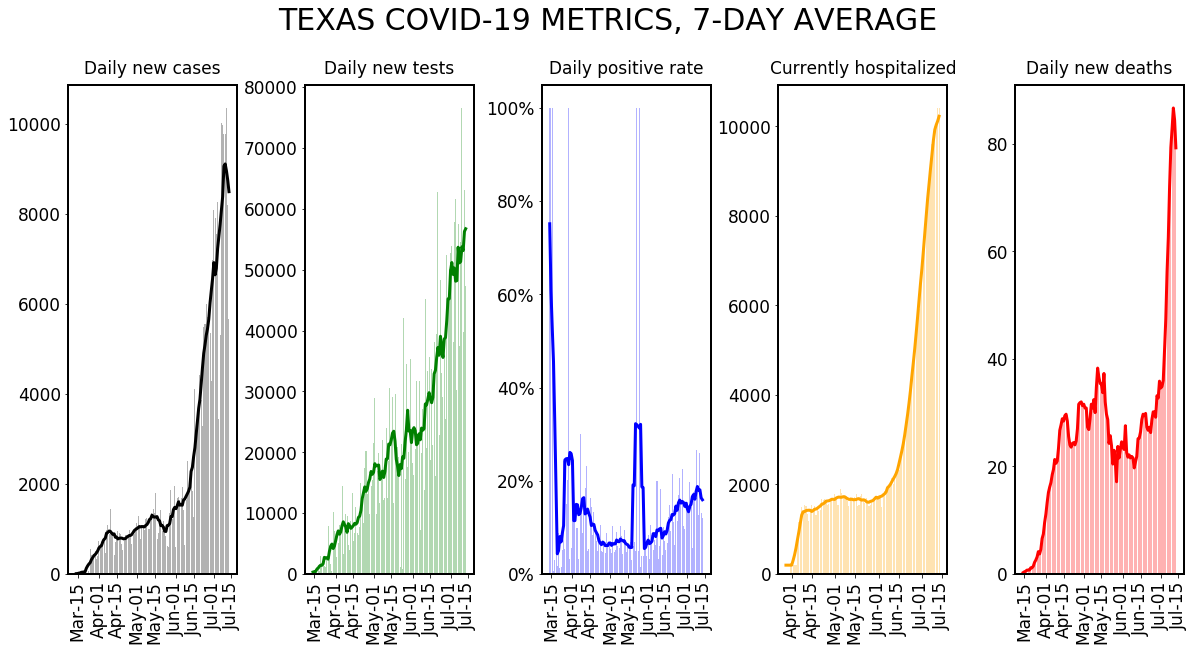

           date state  positive  negative  pending  hospitalizedCurrently  \
0    2020-07-13    AK    1539.0  145051.0      NaN                   22.0   
1    2020-07-13    AL   55545.0  464059.0      NaN                 1335.0   
2    2020-07-13    AR   28939.0  354035.0      NaN                  439.0   
3    2020-07-13    AS       0.0     816.0      NaN                    NaN   
4    2020-07-13    AZ  123824.0  578602.0      NaN                 3373.0   
...         ...   ...       ...       ...      ...                    ...   
7292 2020-01-26    WA       2.0       0.0      NaN                    NaN   
7293 2020-01-25    WA       2.0       0.0      NaN                    NaN   
7294 2020-01-24    WA       2.0       0.0      NaN                    NaN   
7295 2020-01-23    WA       2.0       0.0      NaN                    NaN   
7296 2020-01-22    WA       2.0       0.0      NaN                    NaN   

      hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0         

In [70]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    
    if focus_state == 'TX':
        pass
    else:
         continue
    
    
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    #fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax5.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax5.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax5.bar(x=focus.index, height=focus['average_death_increase'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('TEXAS COVID-19 METRICS, 7-DAY AVERAGE', fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()
    print(df)

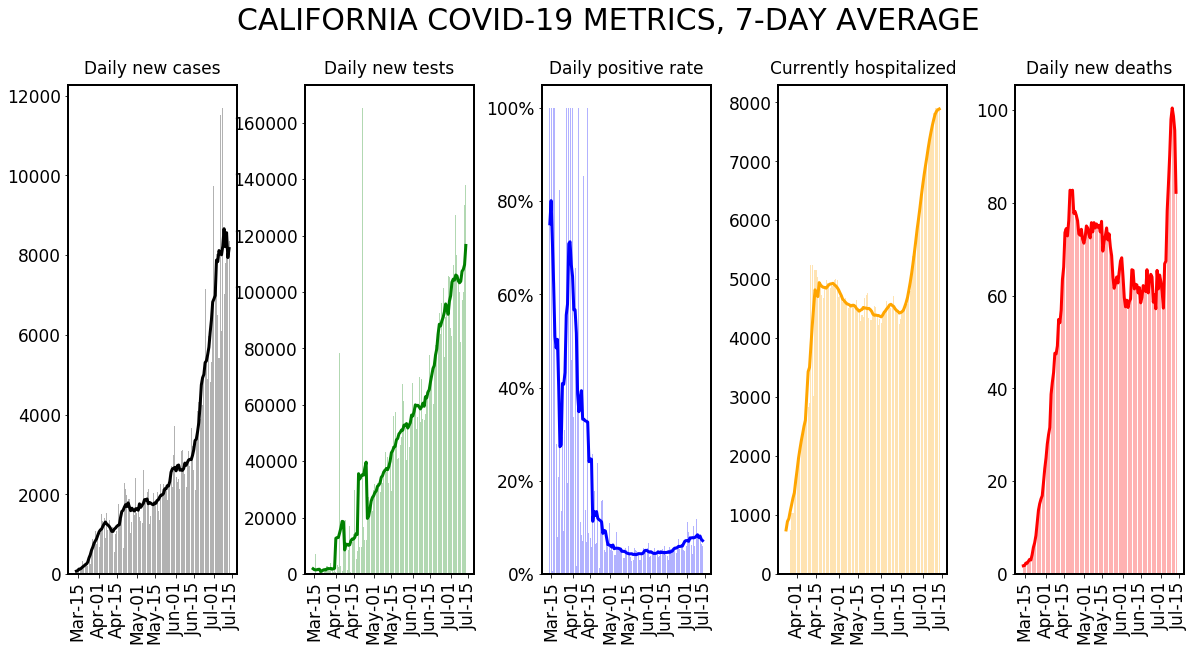

In [49]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    
    if focus_state == 'CA':
        pass
    else:
         continue
    
    
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    #fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax5.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax5.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax5.bar(x=focus.index, height=focus['average_death_increase'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('CALIFORNIA COVID-19 METRICS, 7-DAY AVERAGE', fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()

In [ ]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    
    if focus_state == 'AZ':
        pass
    else:
         continue
    
    
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    #fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax5.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax5.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax5.bar(x=focus.index, height=focus['average_death_increase'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('ARIZONA COVID-19 METRICS, 7-DAY AVERAGE', fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()

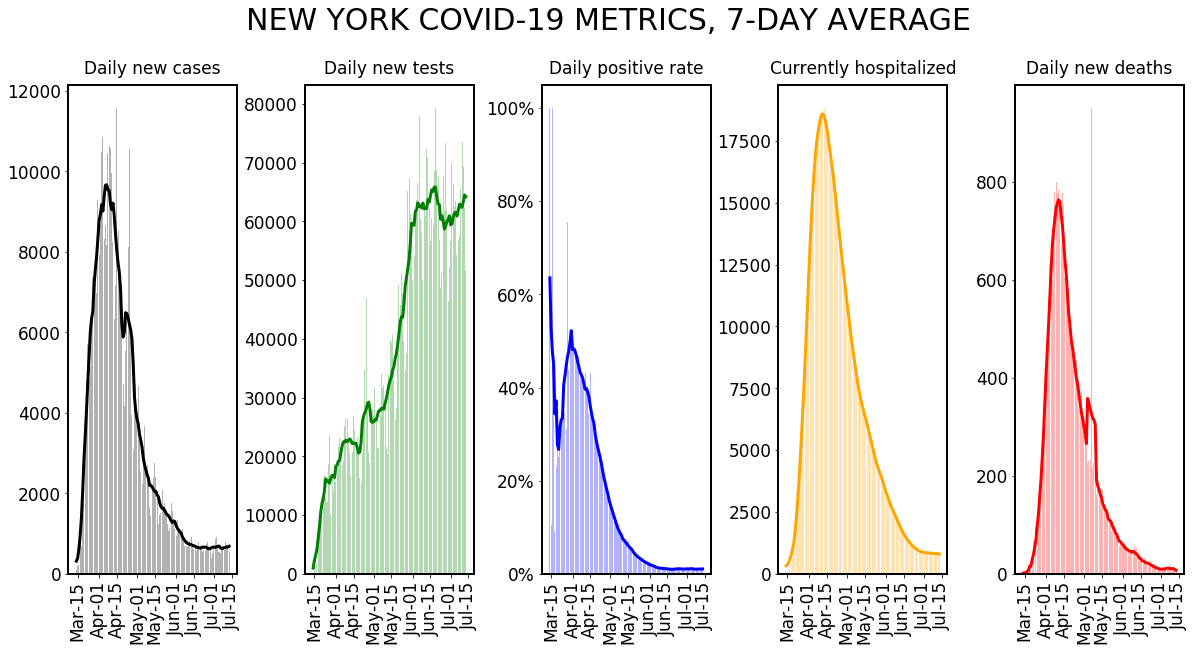

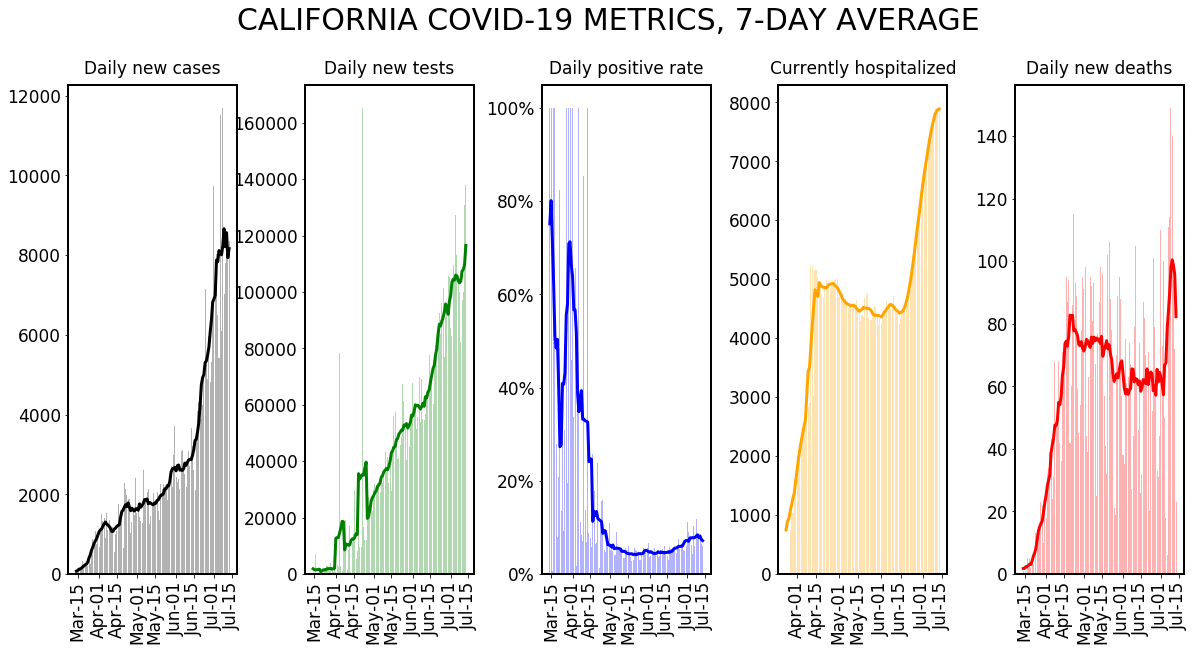

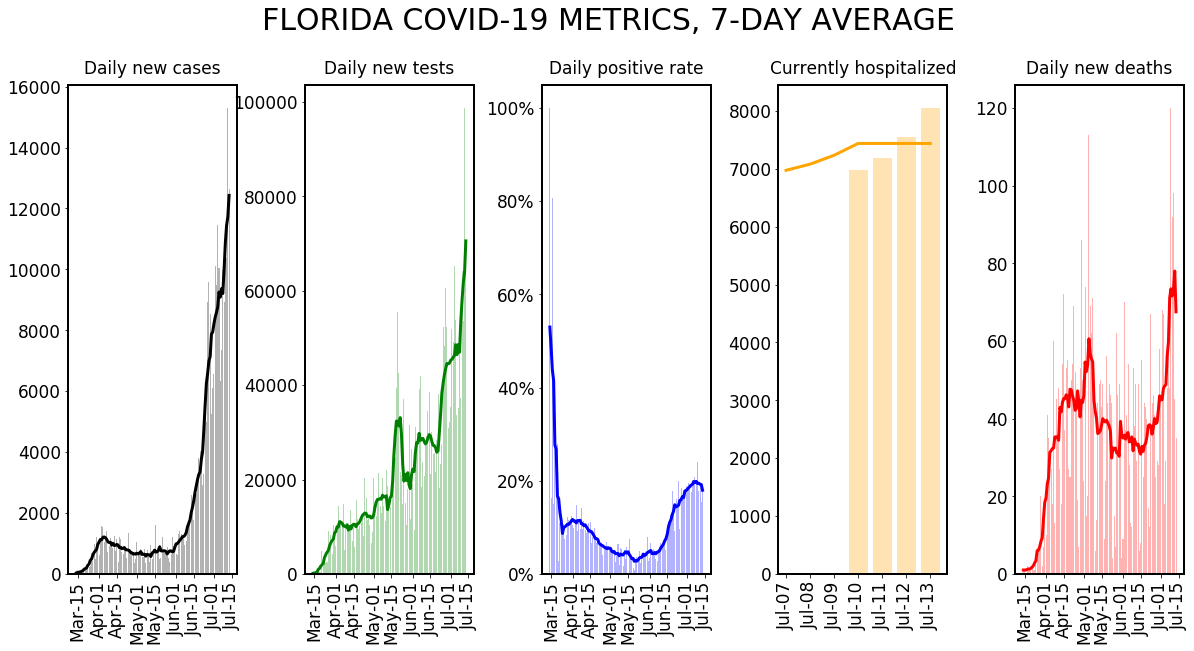

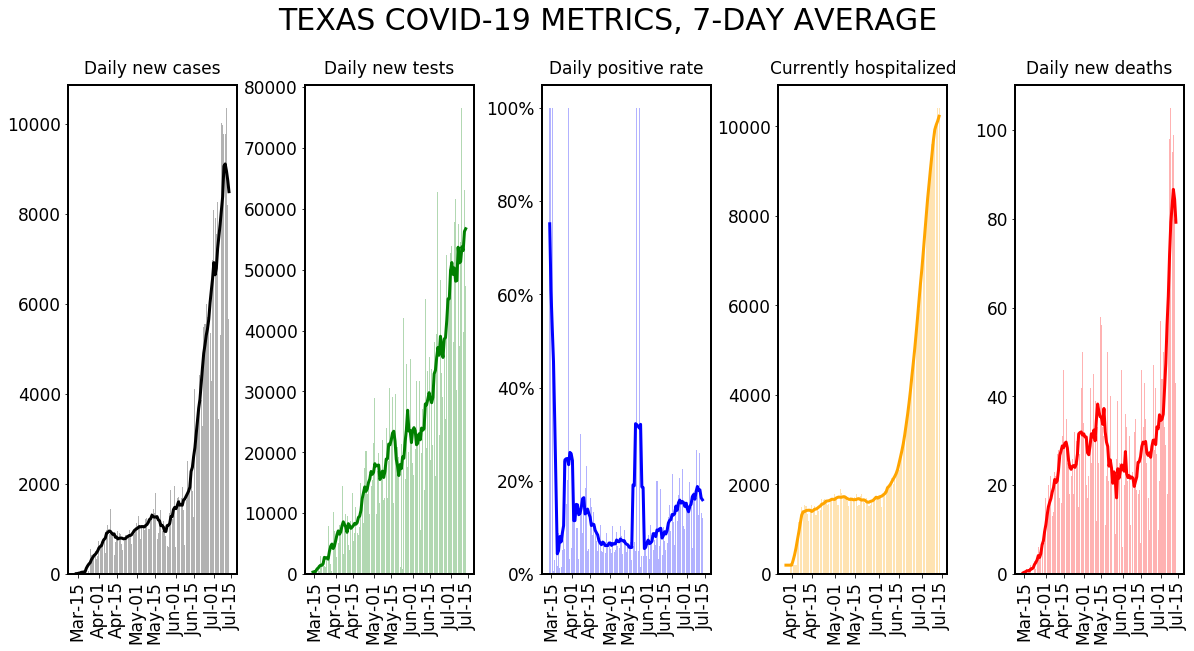

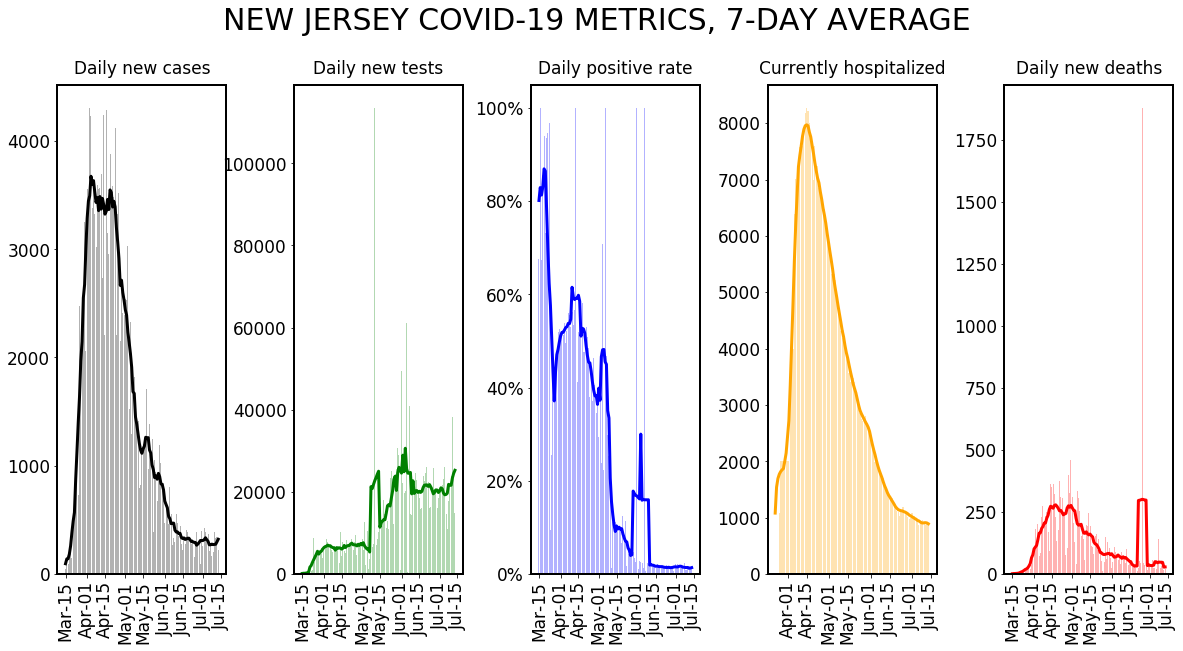

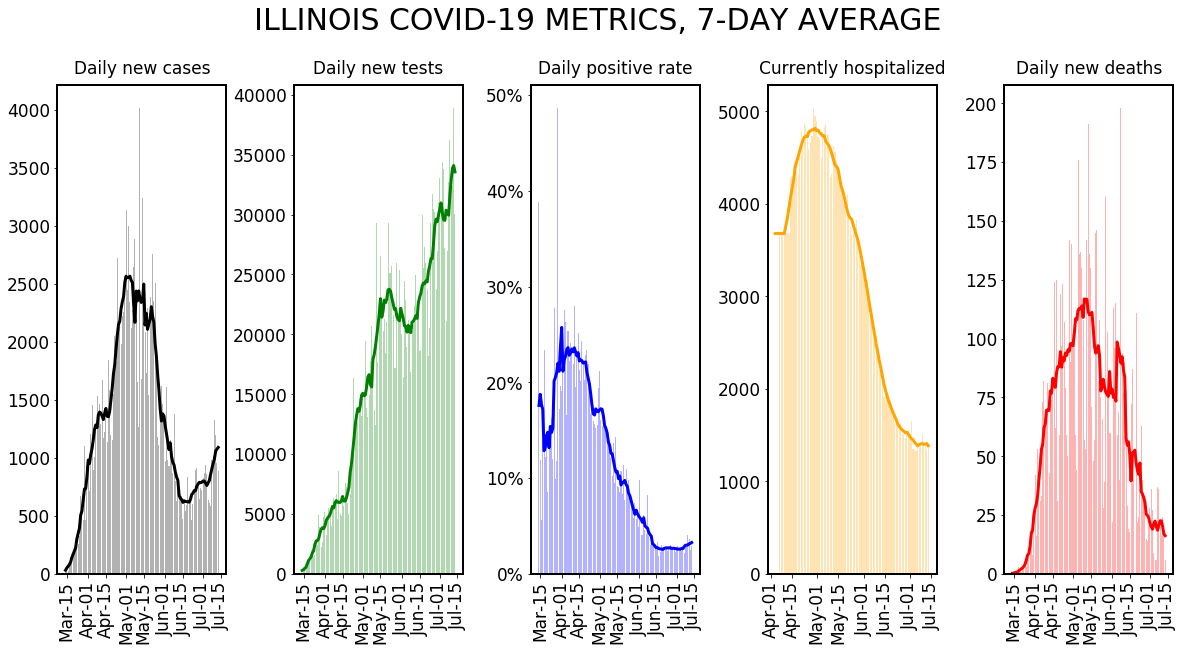

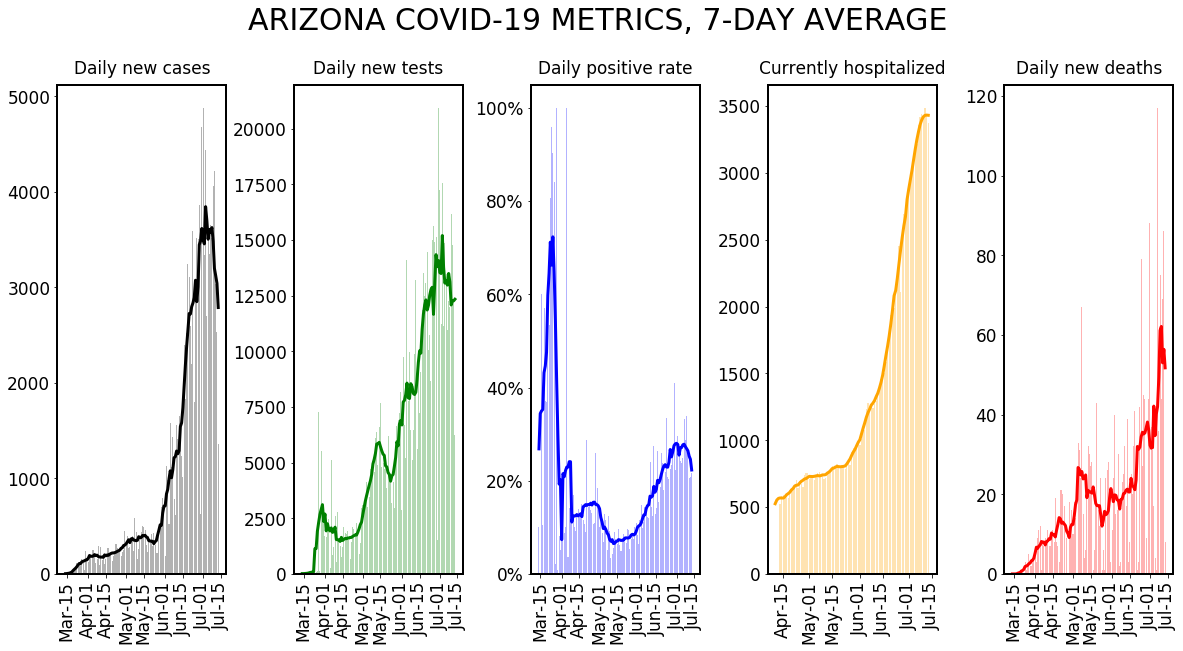

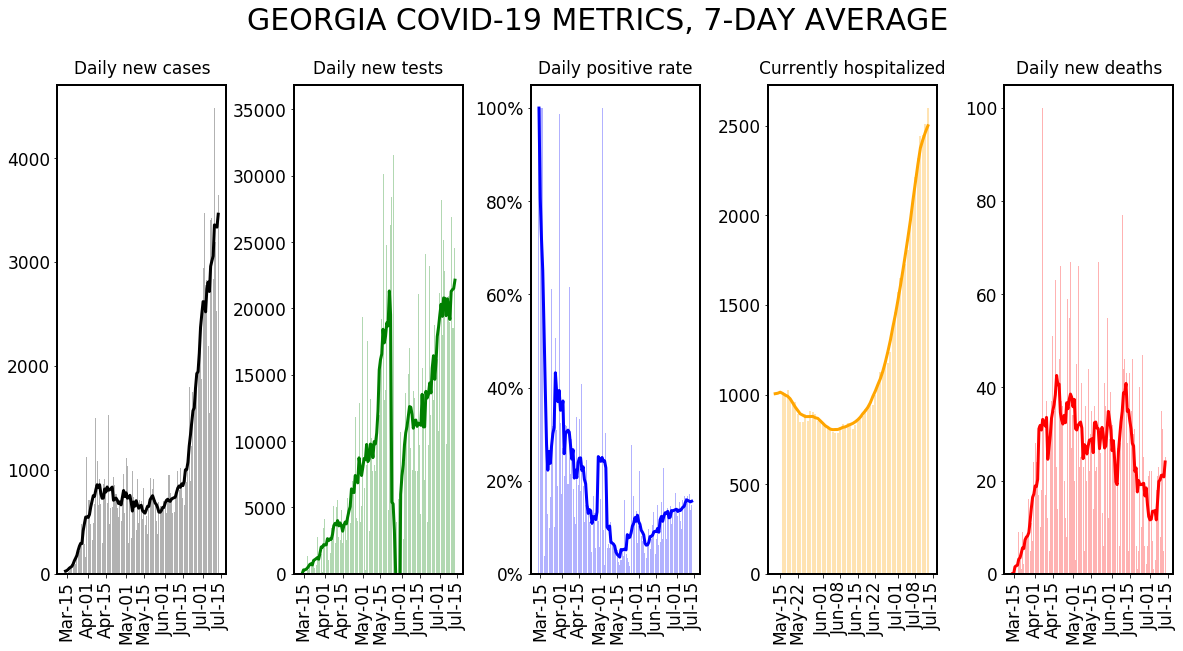

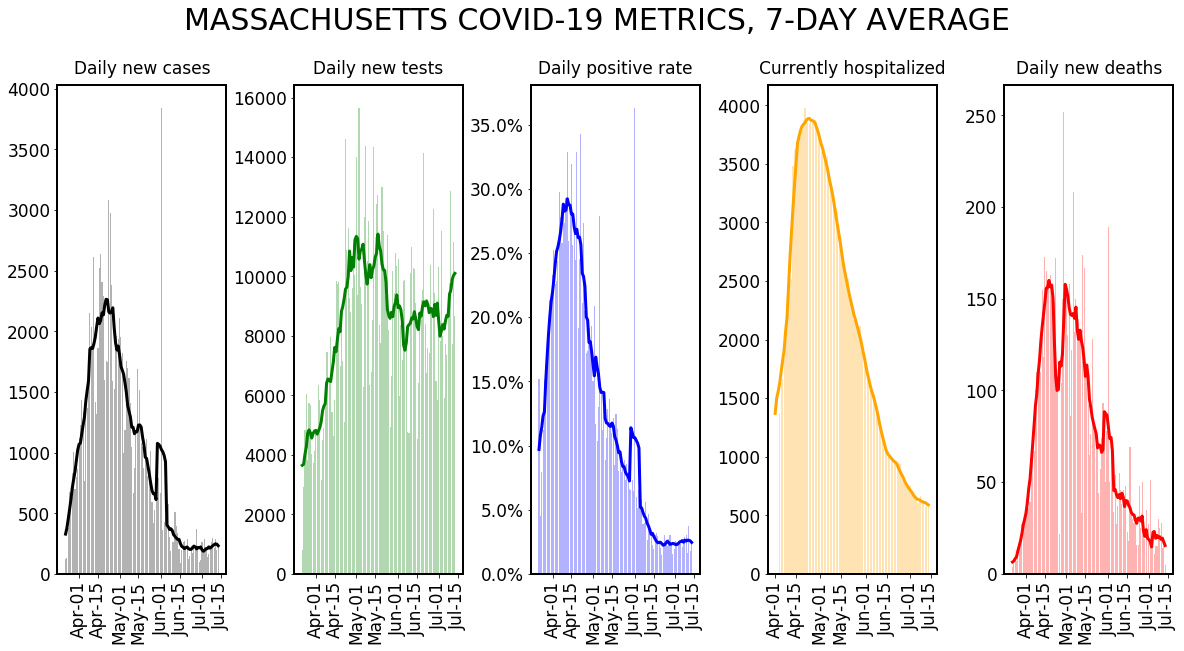

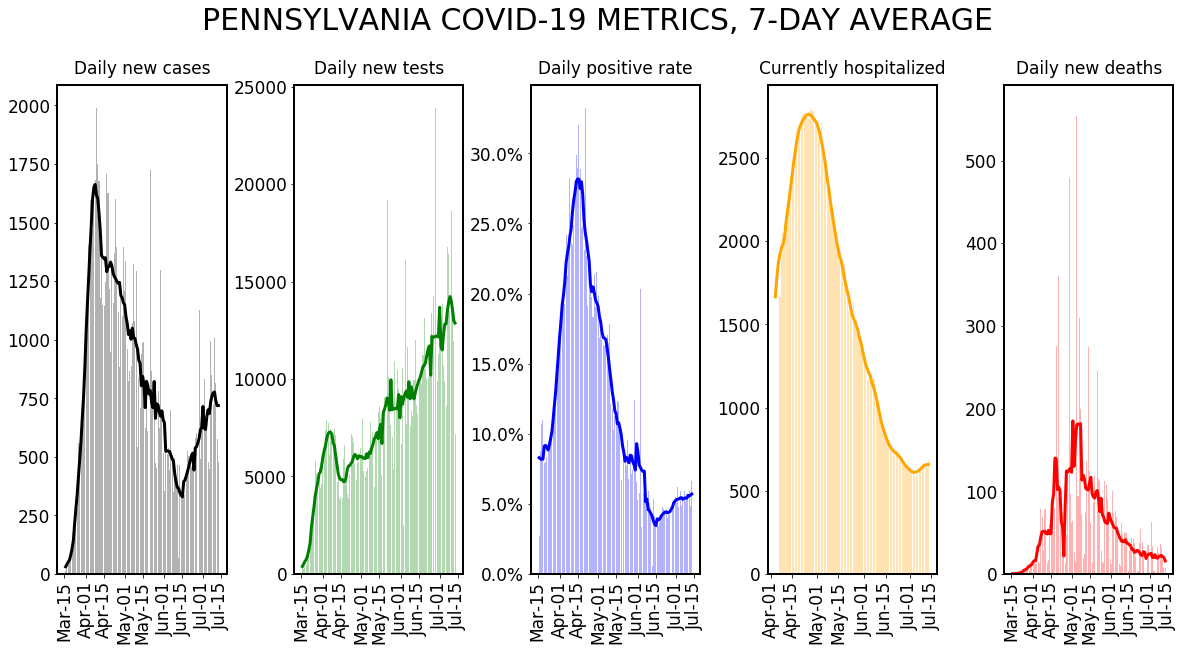

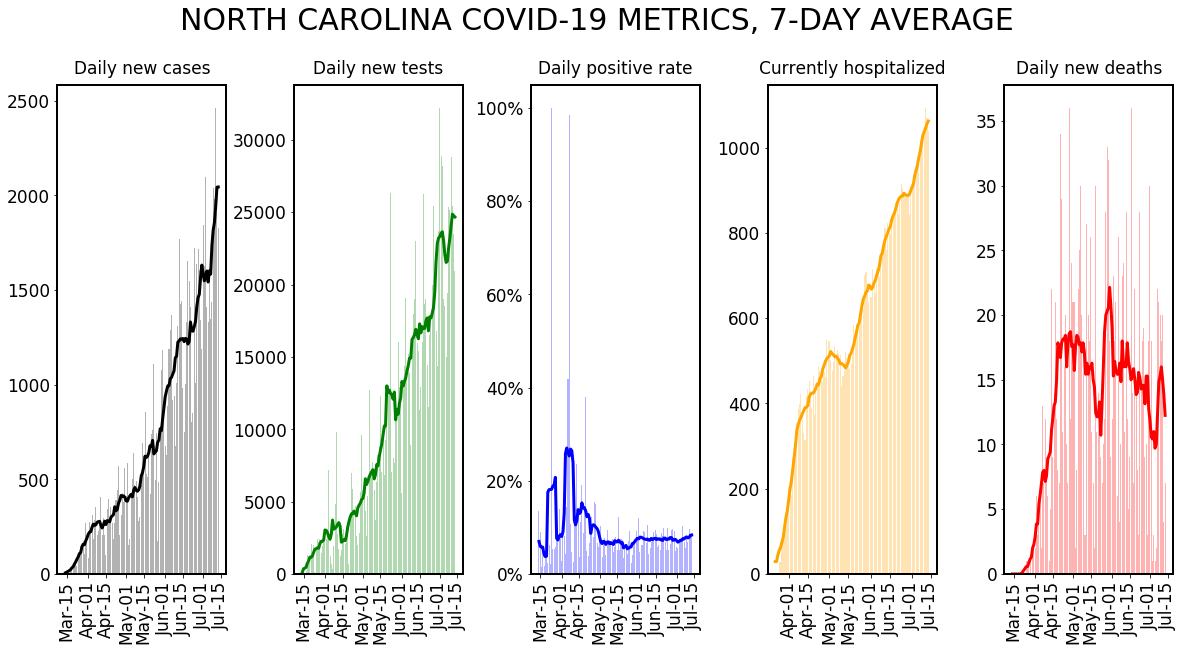

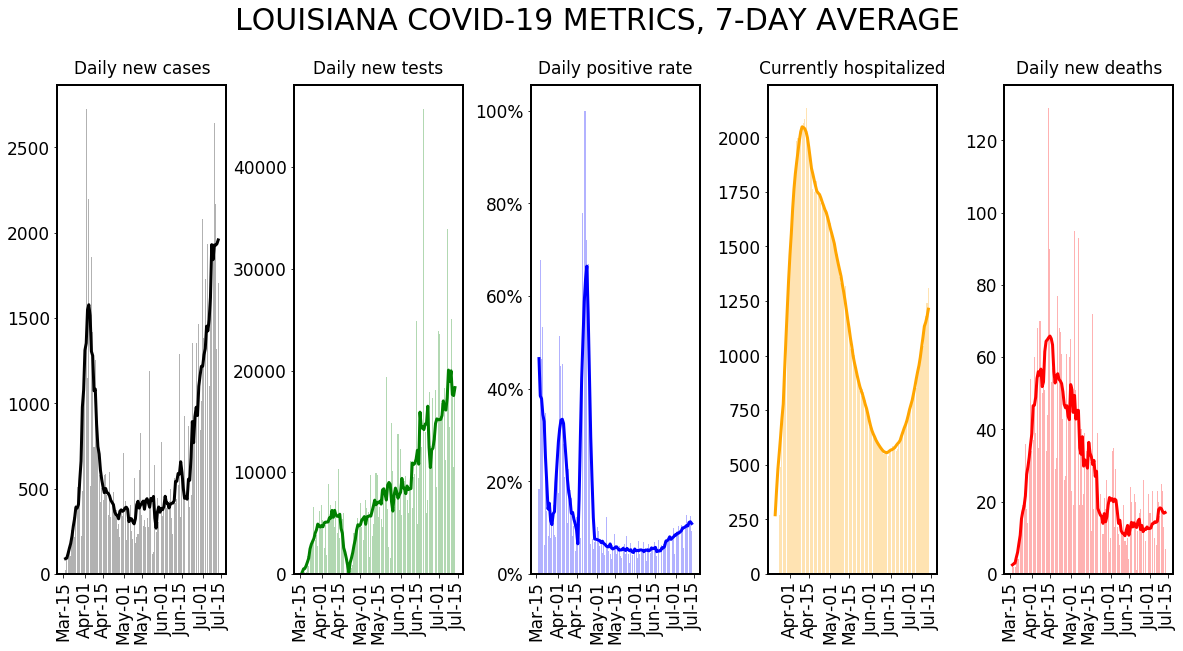

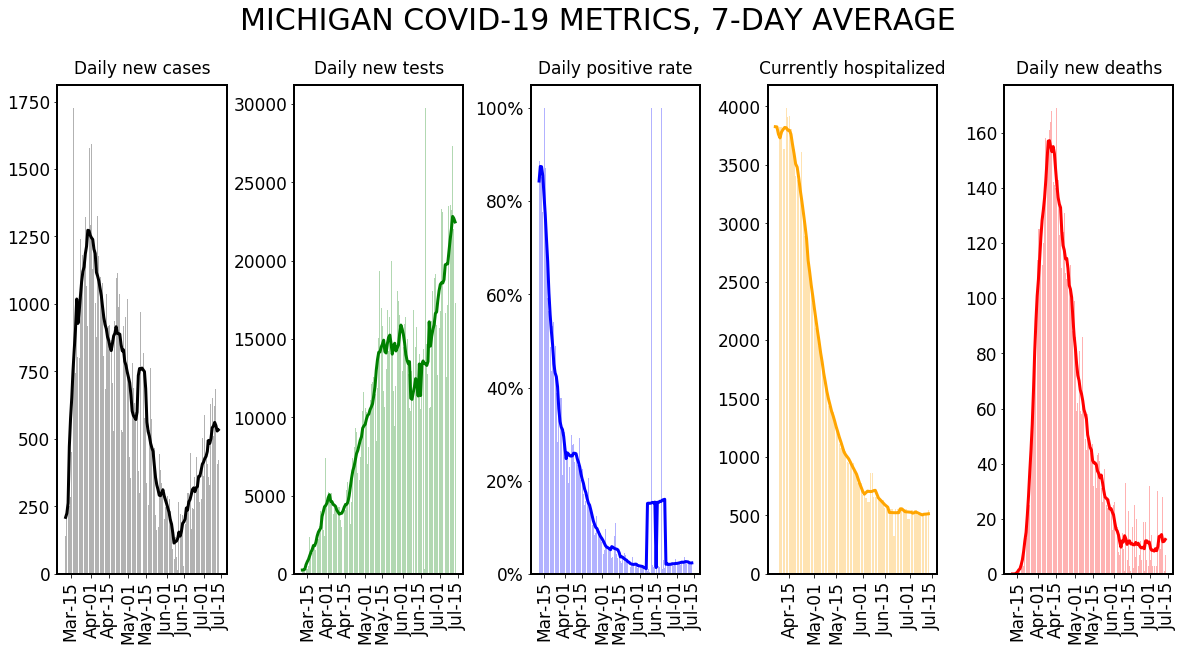

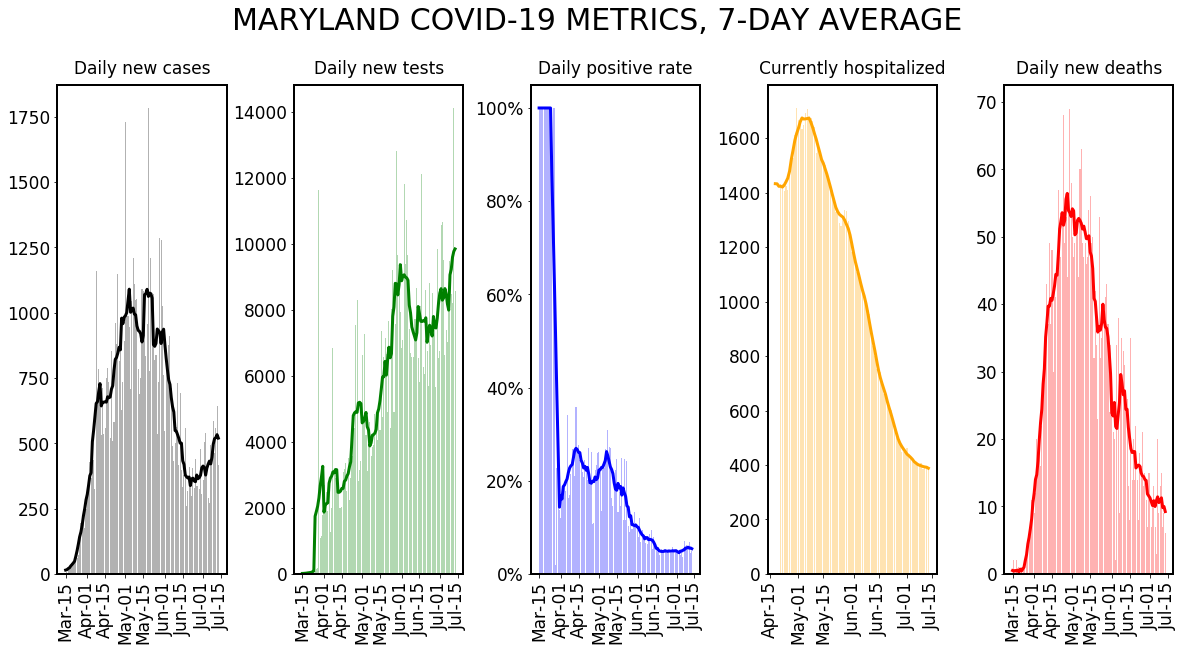

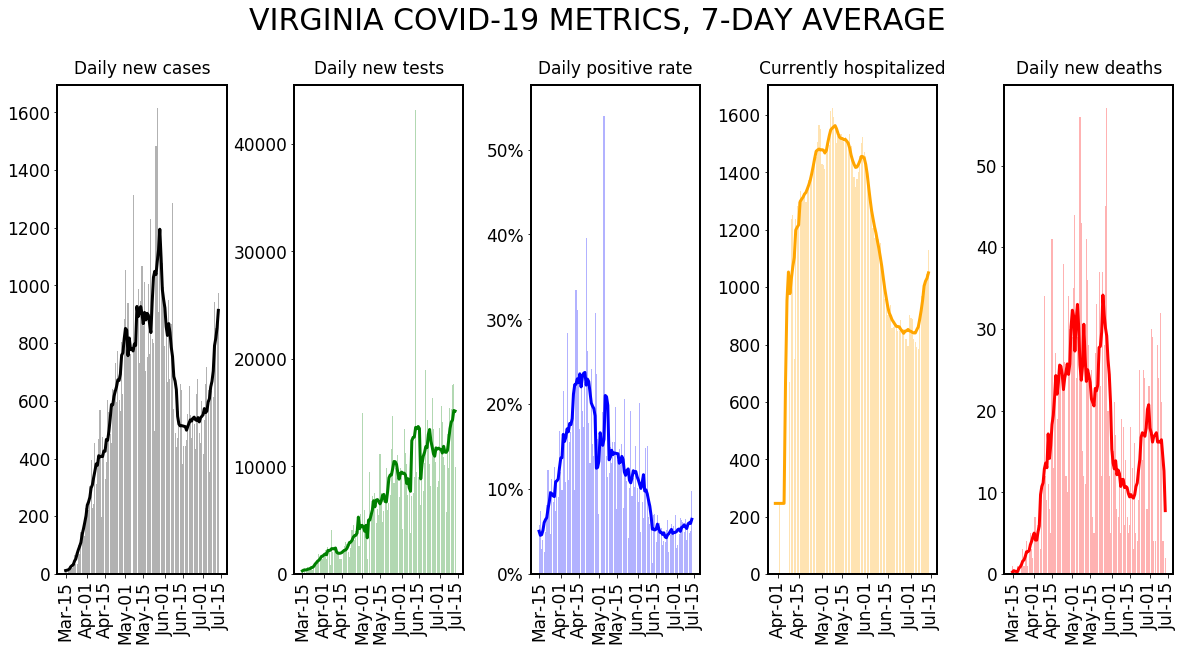

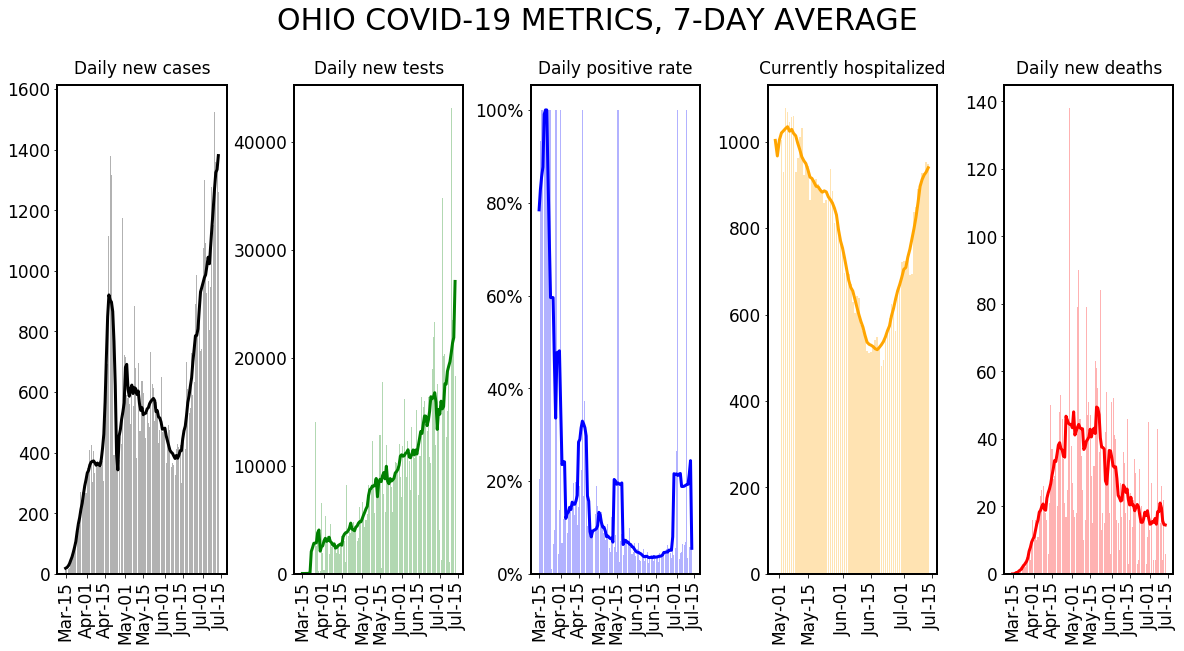

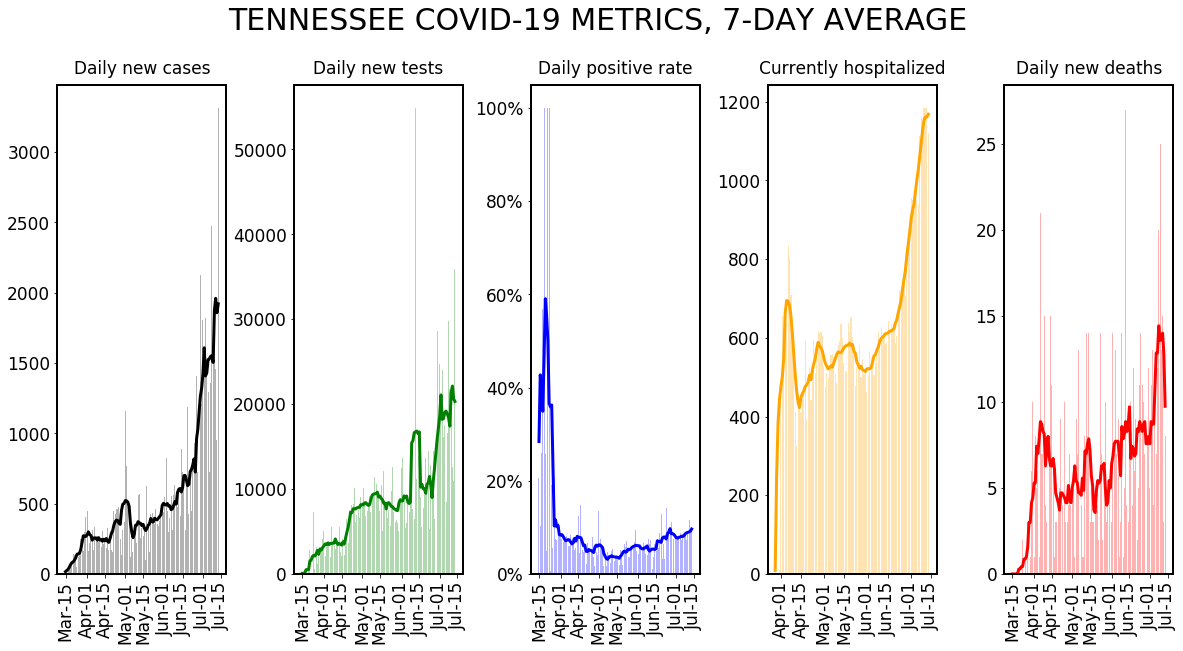

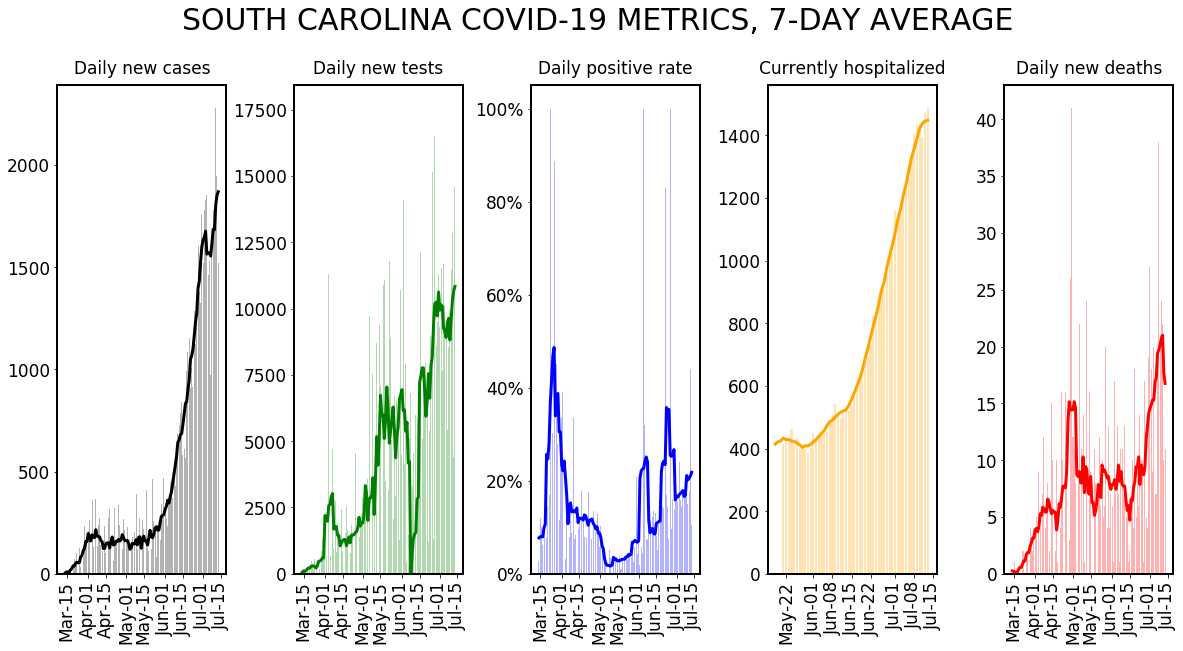

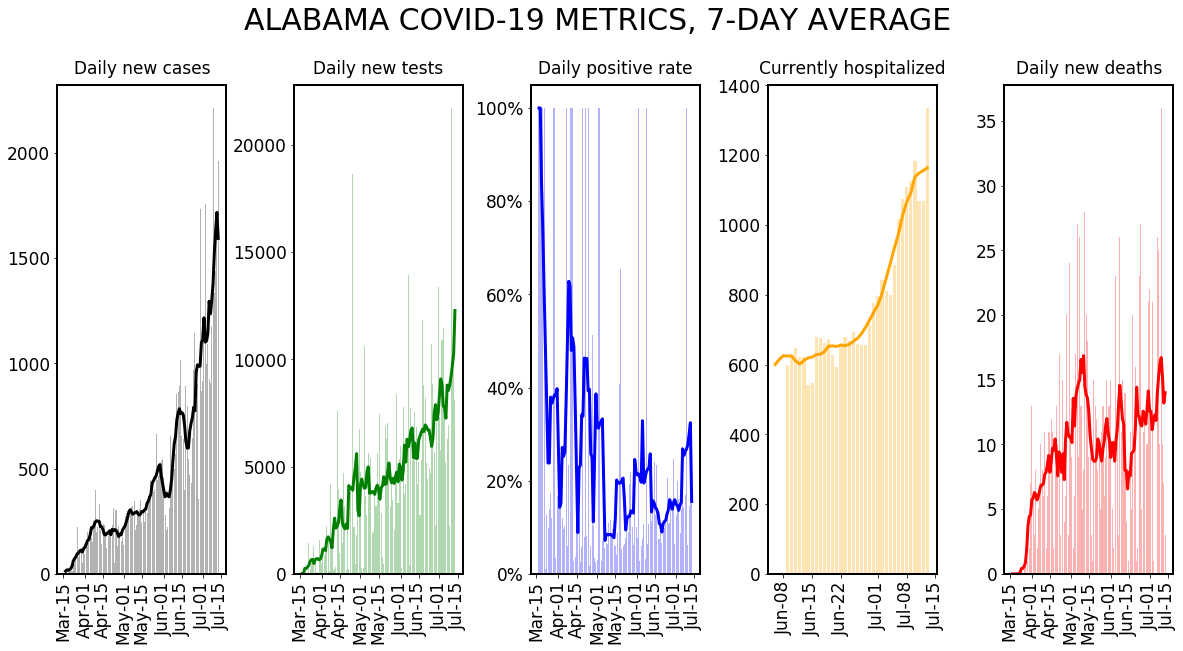

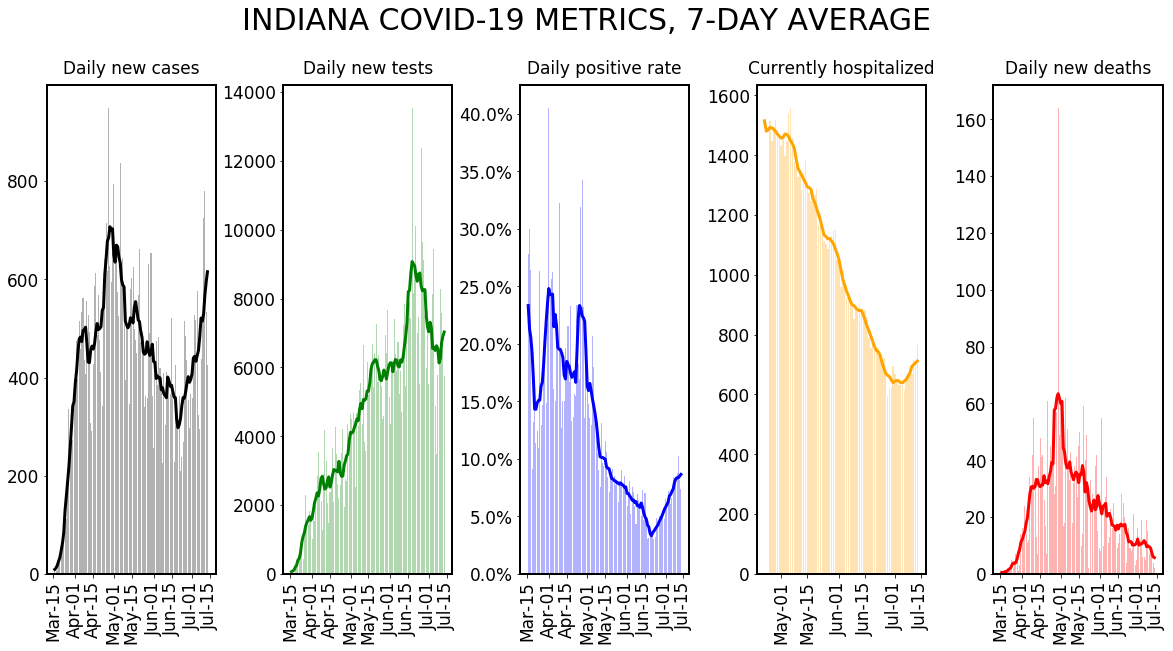

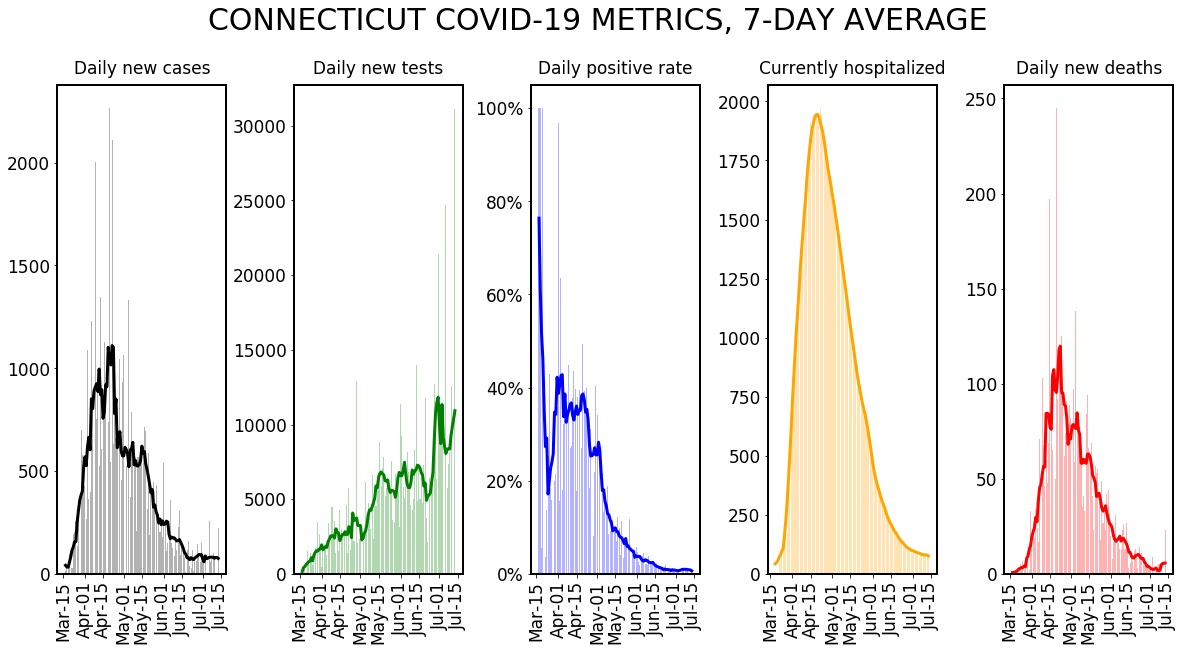

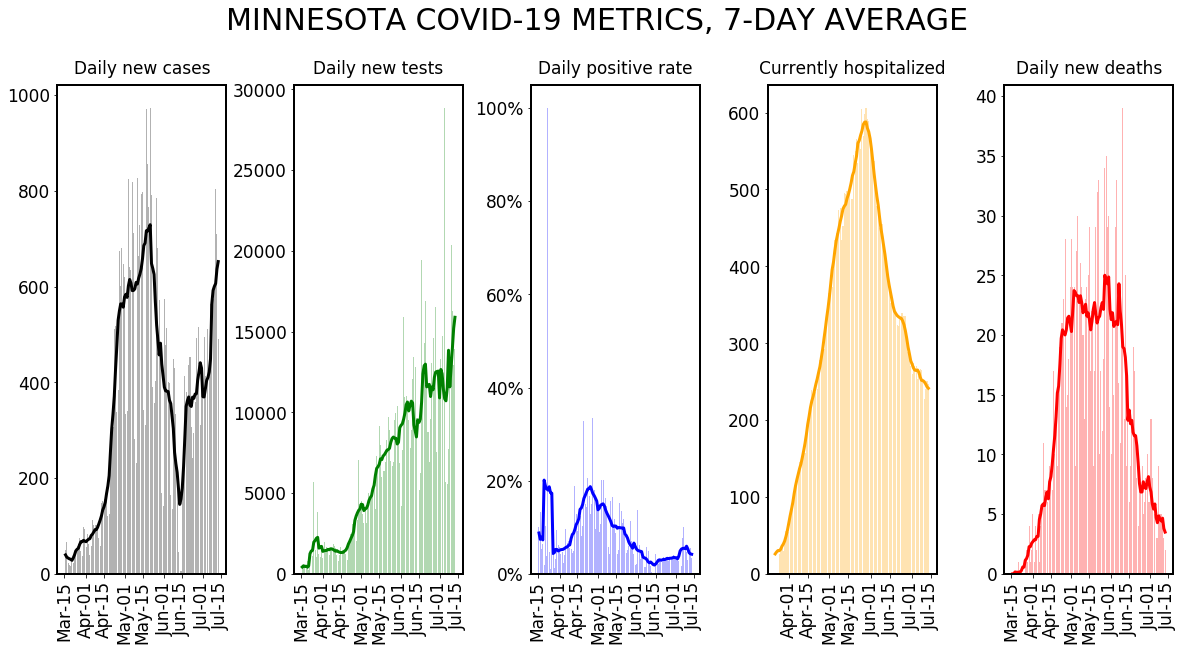

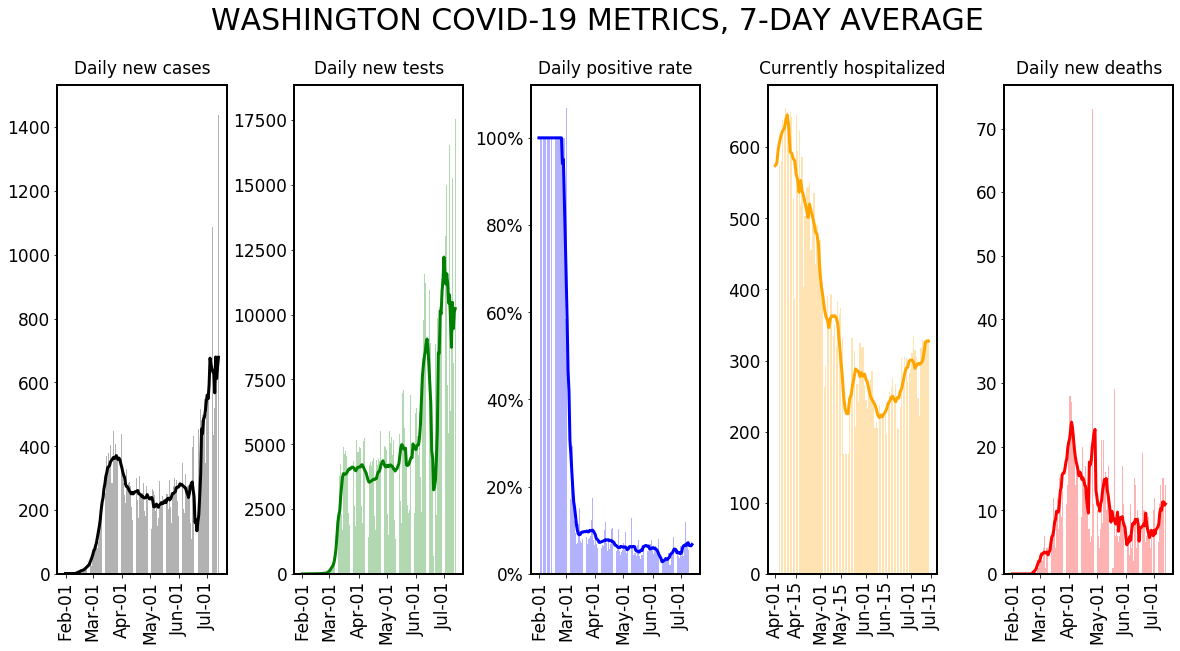

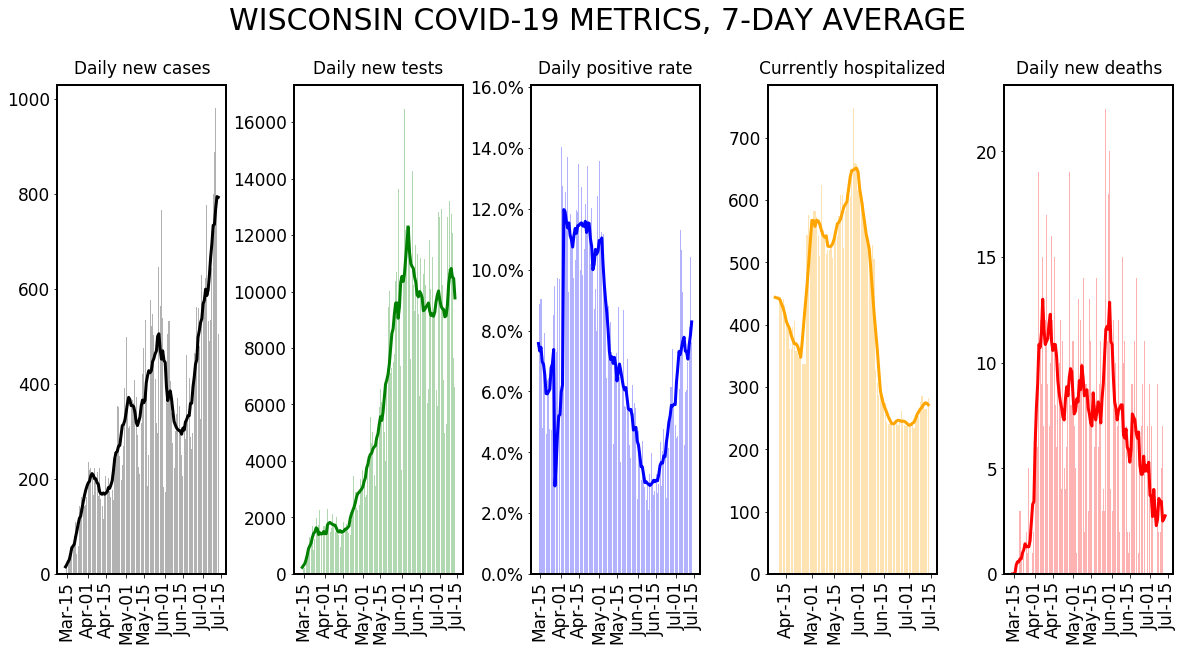

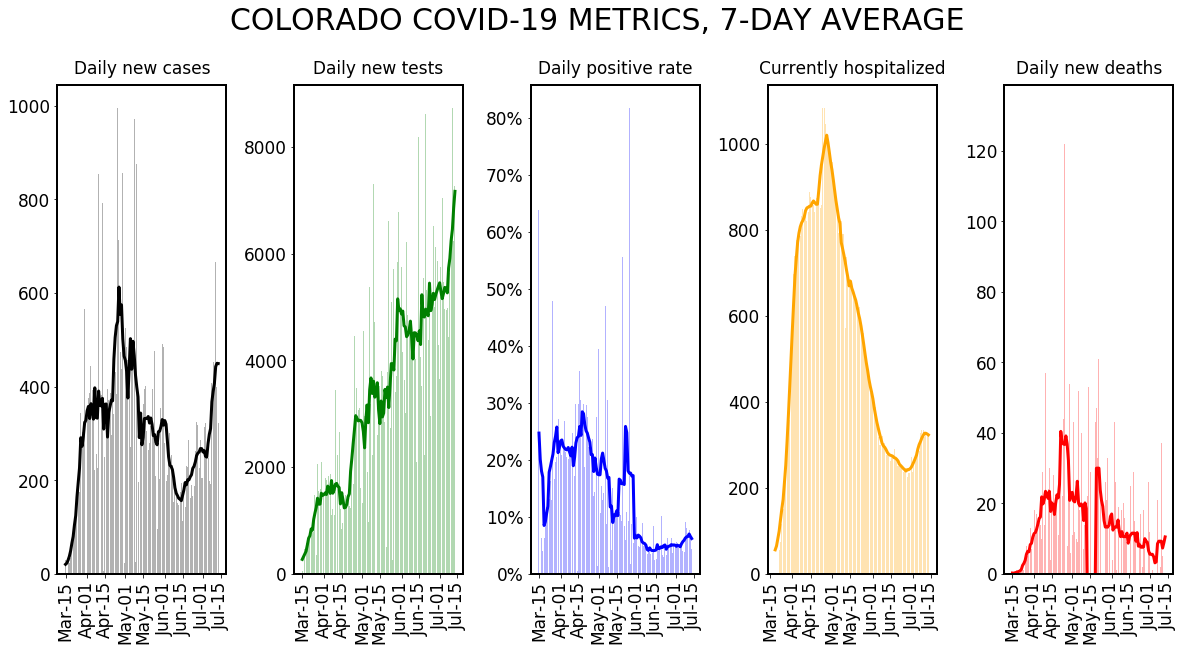

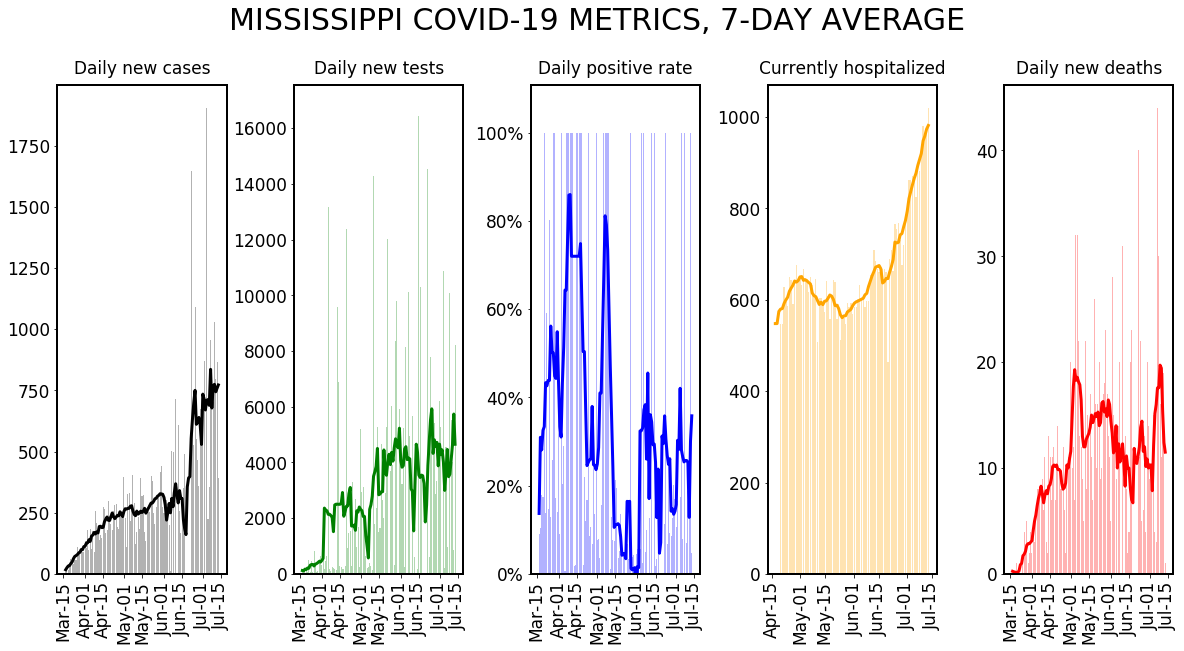

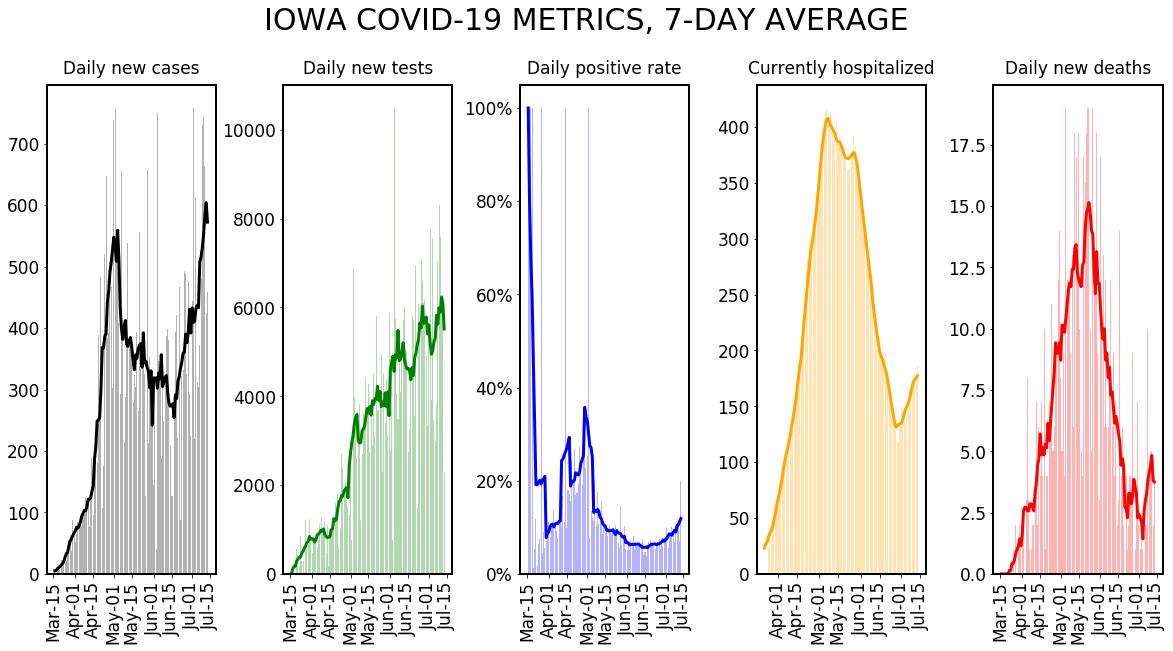

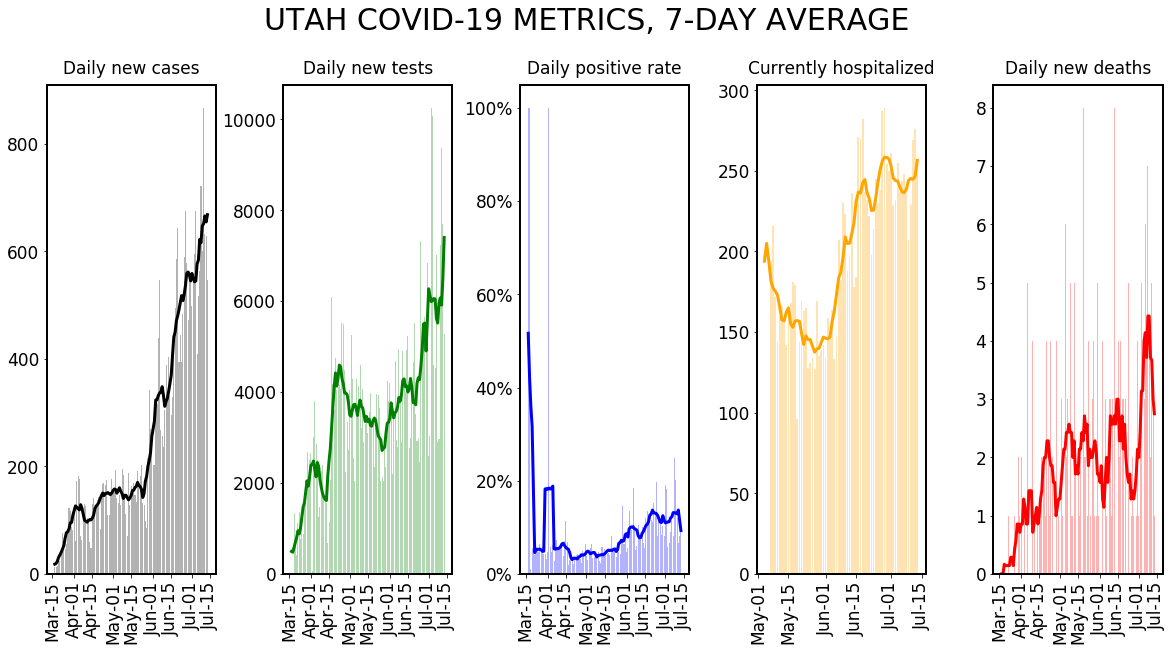

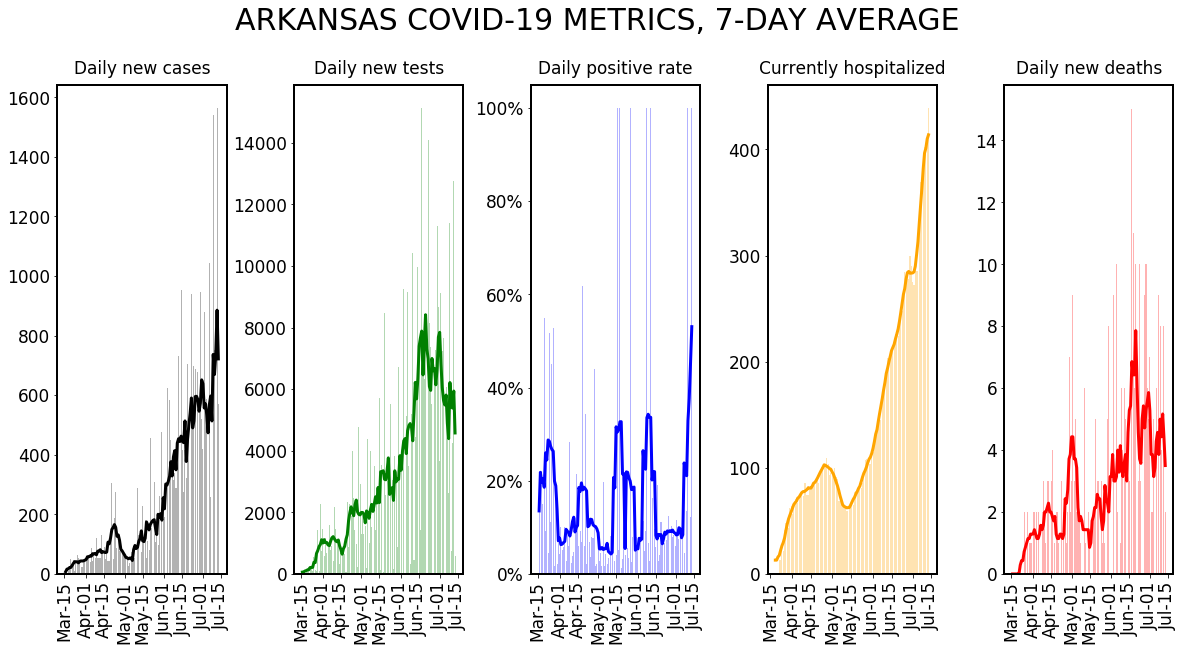

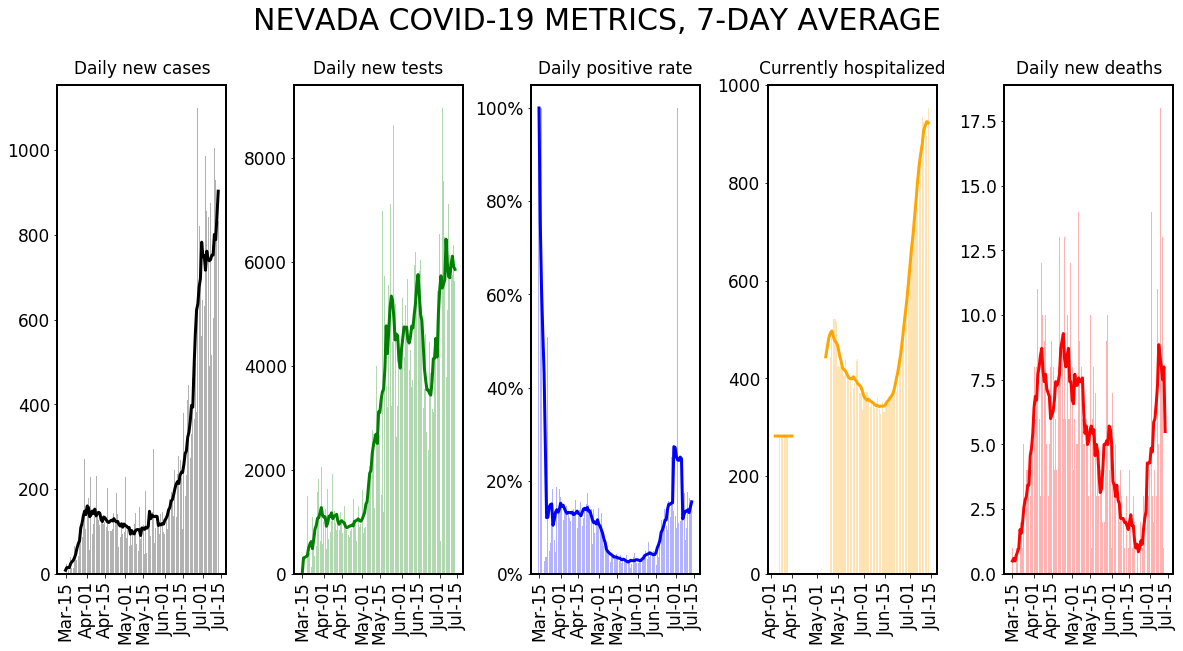

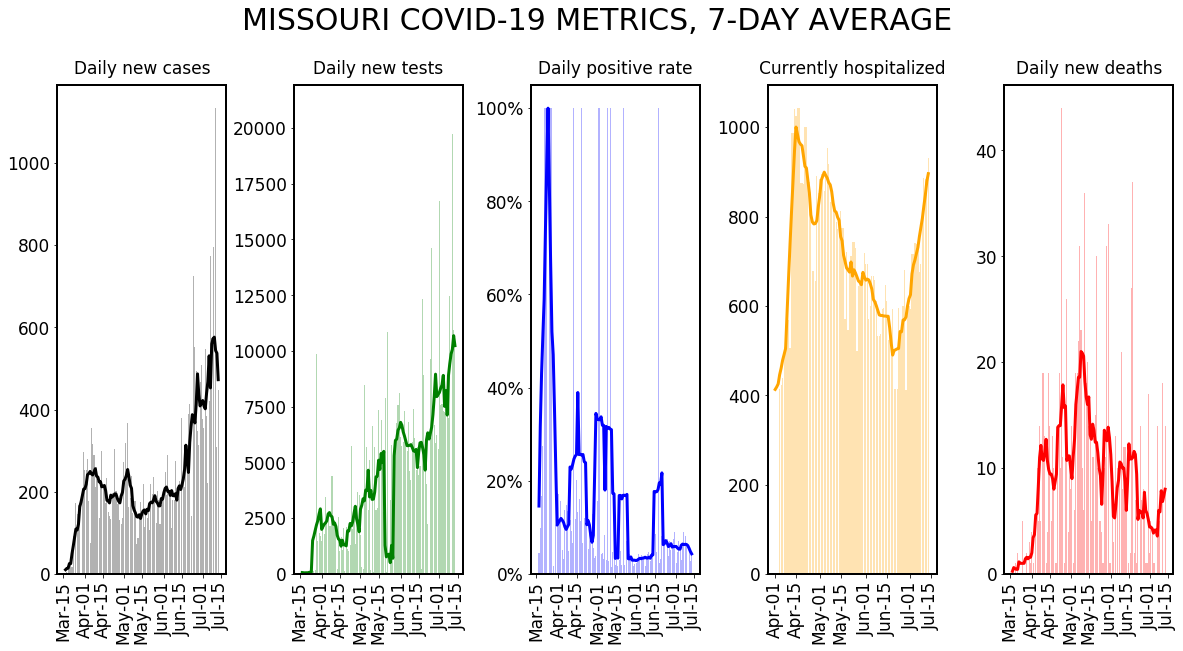

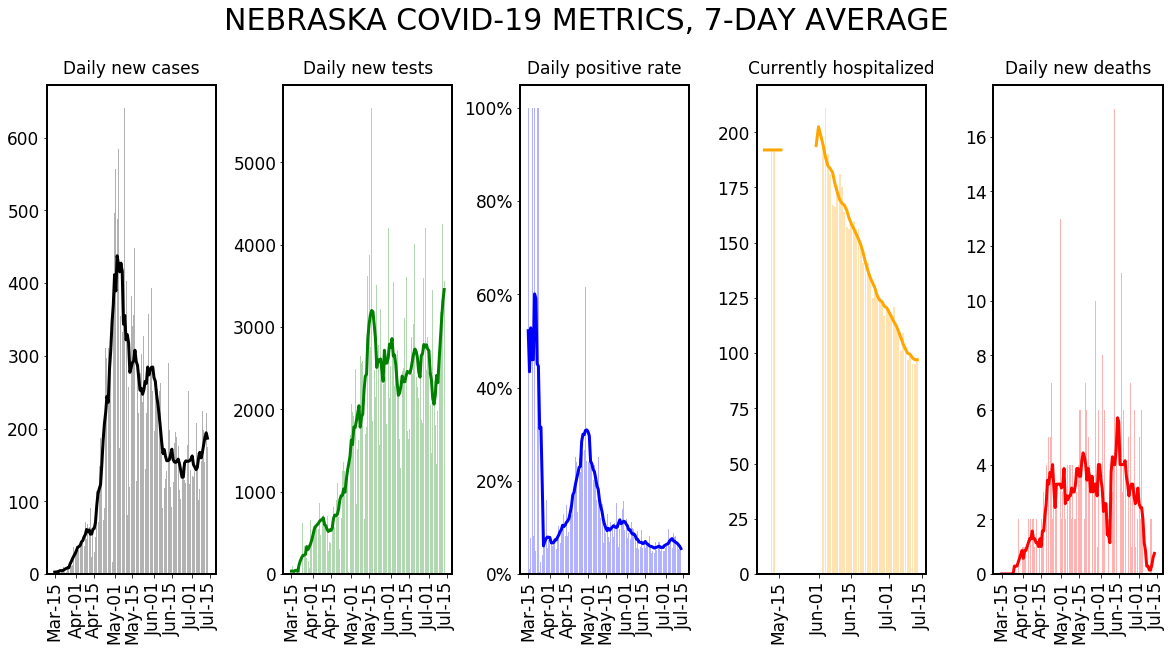

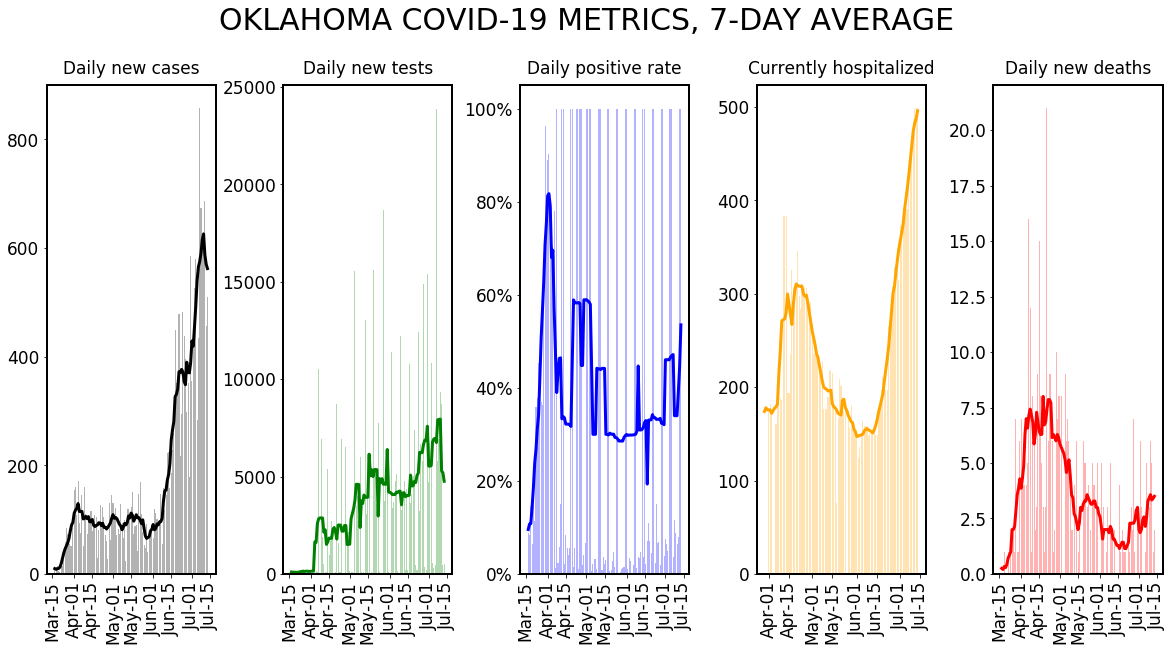

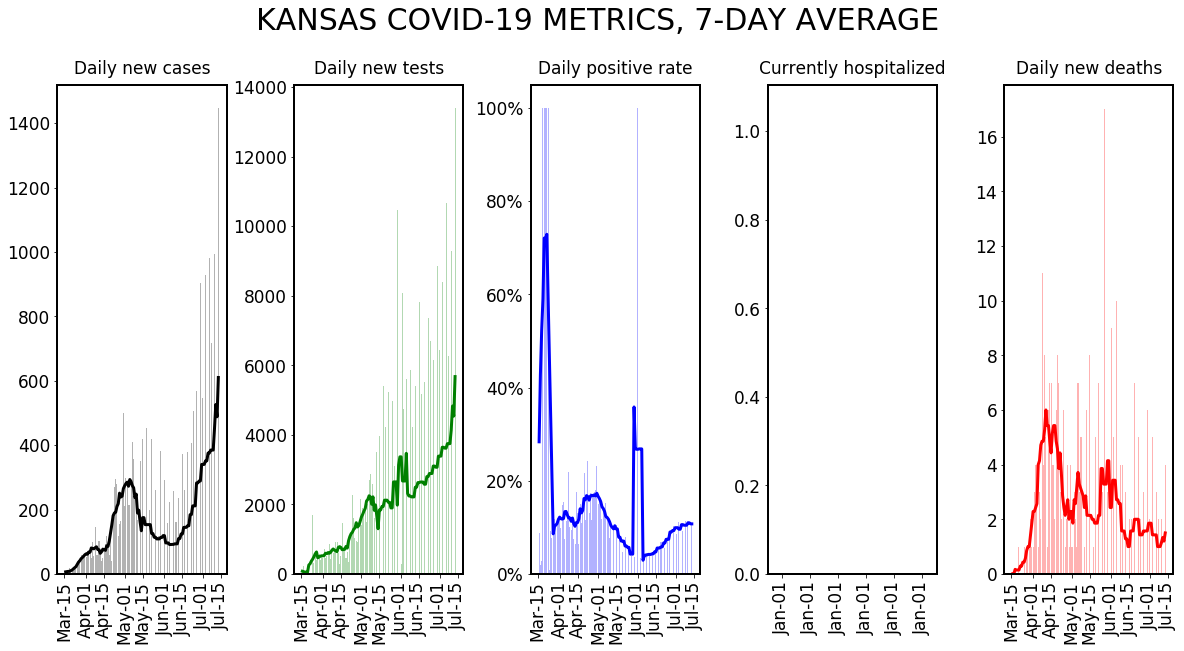

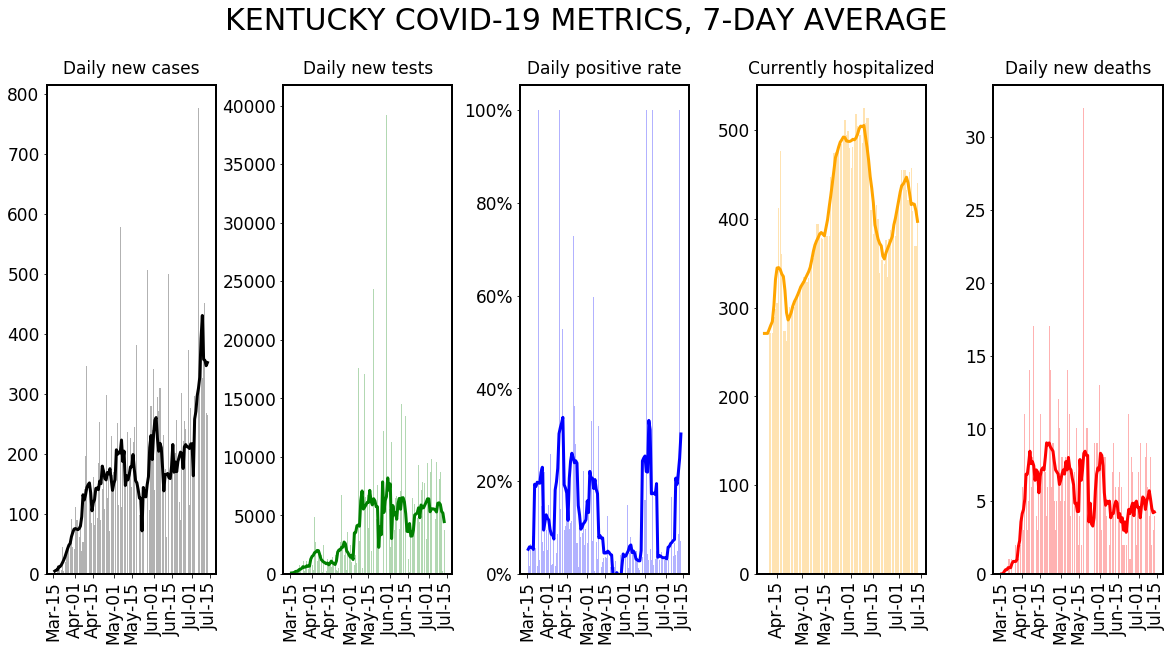

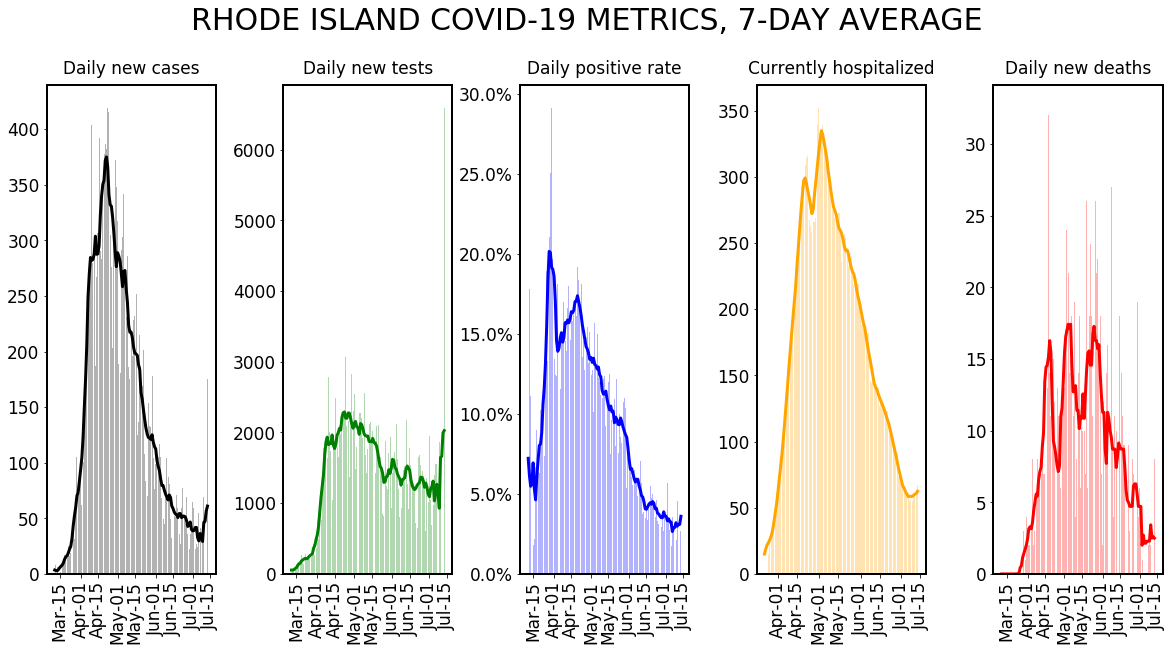

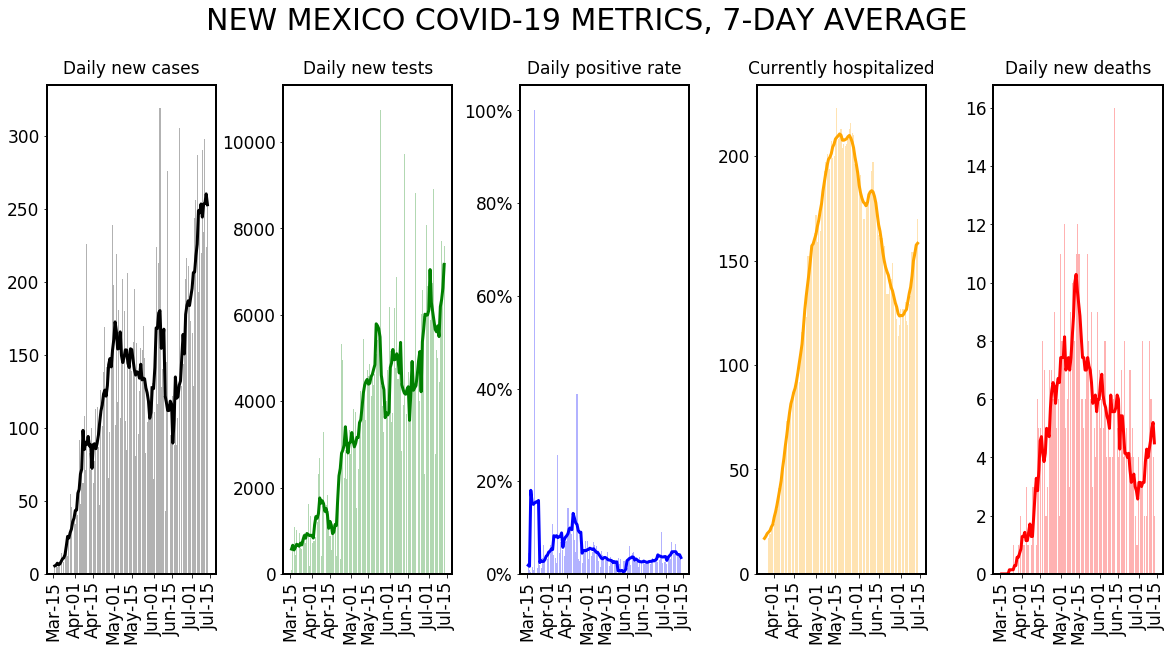

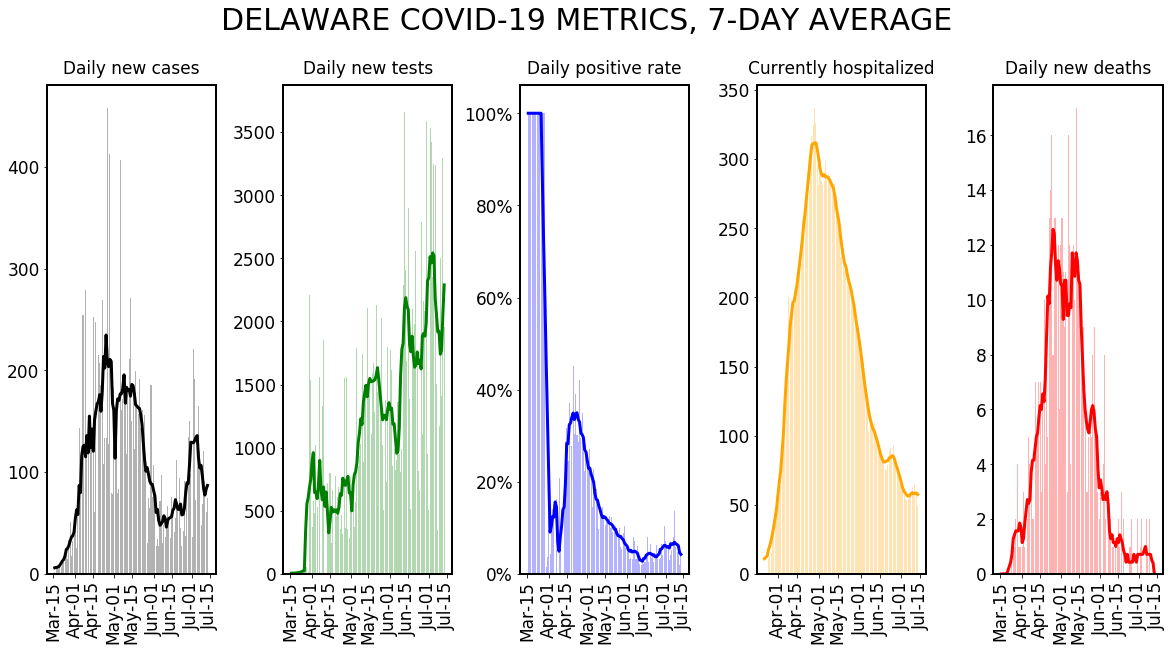

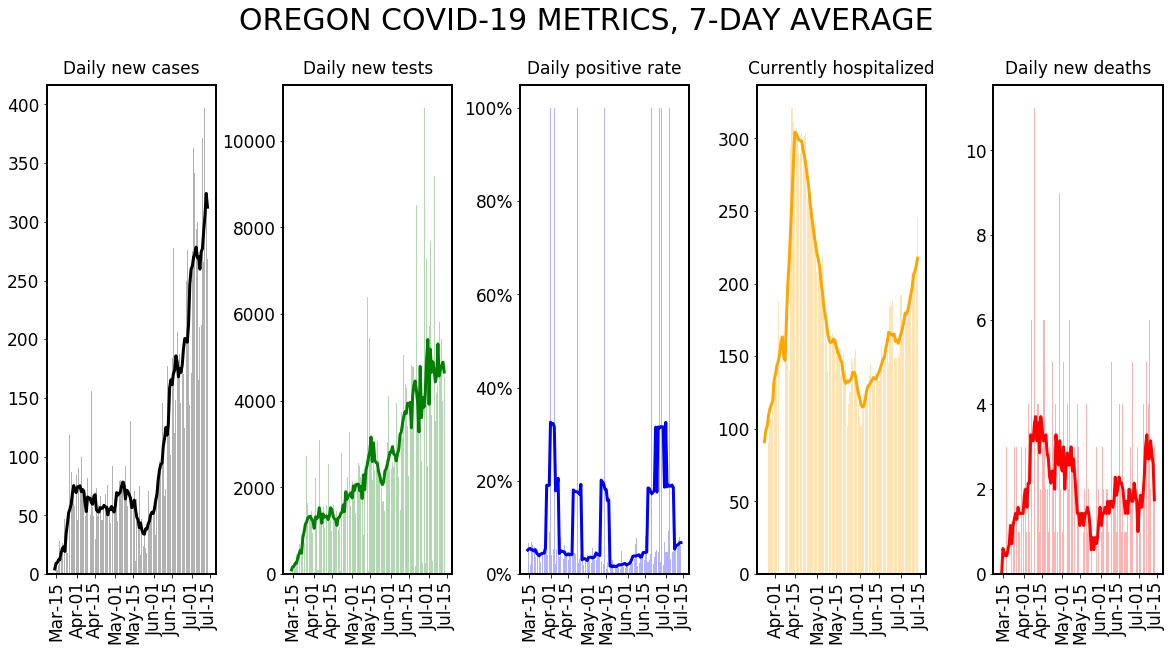

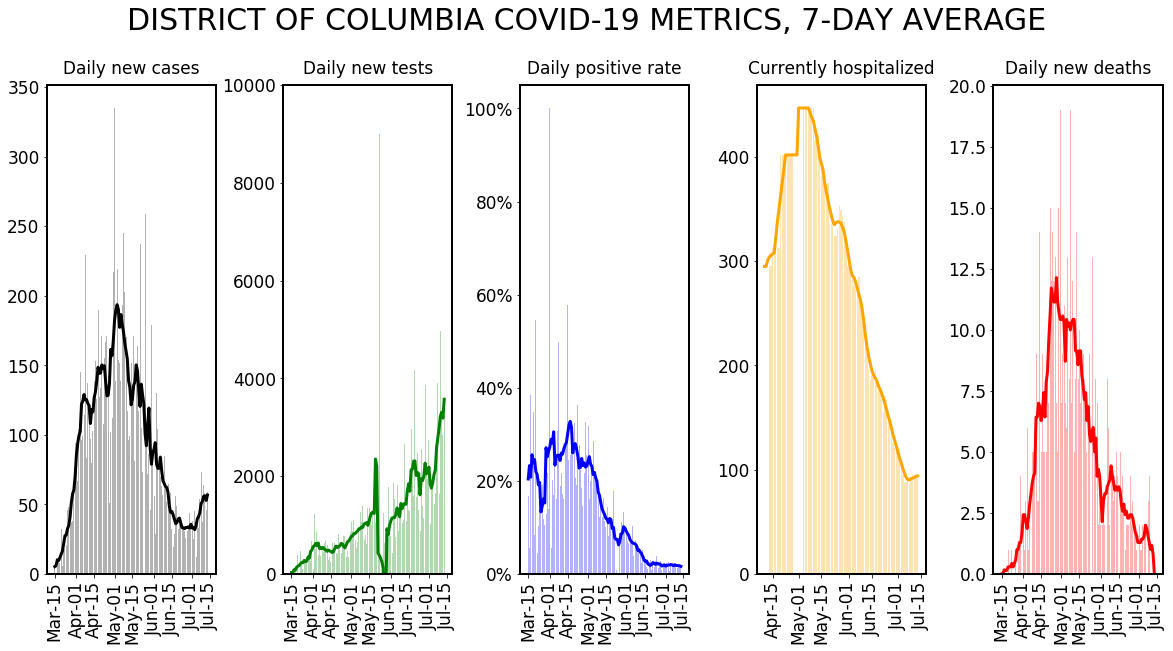

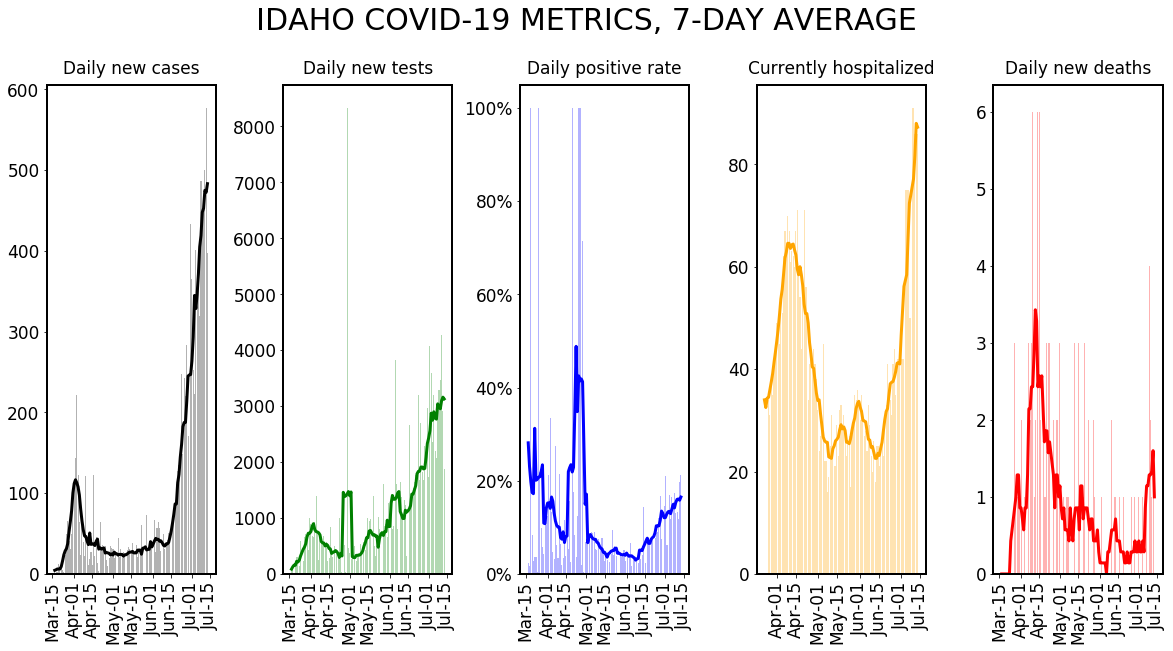

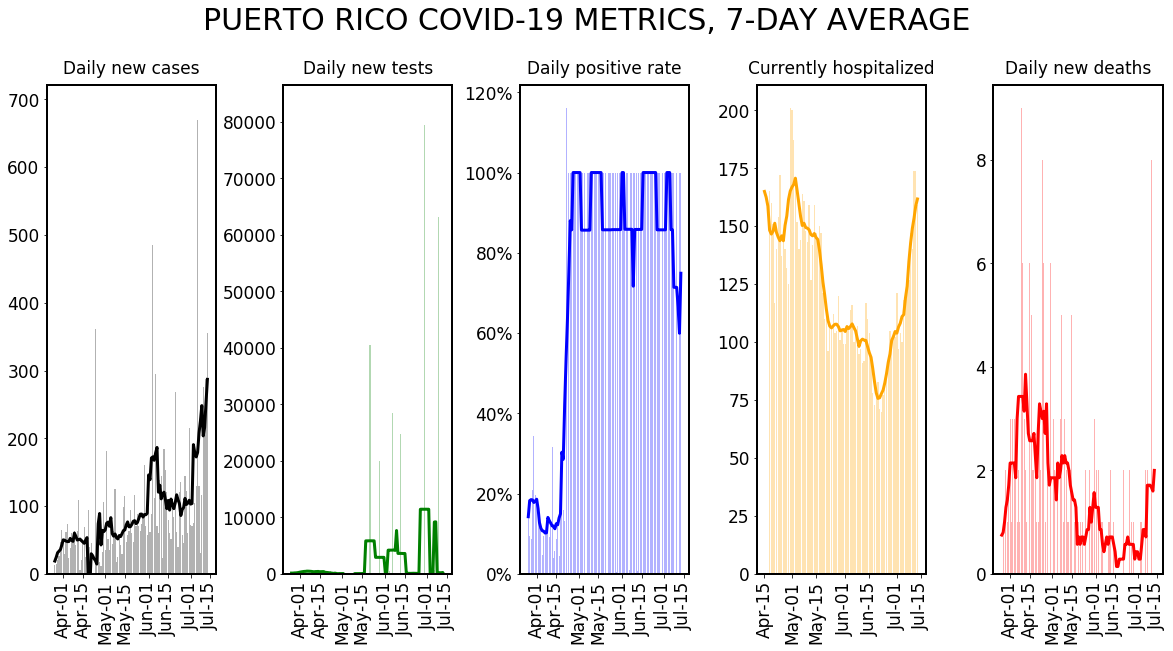

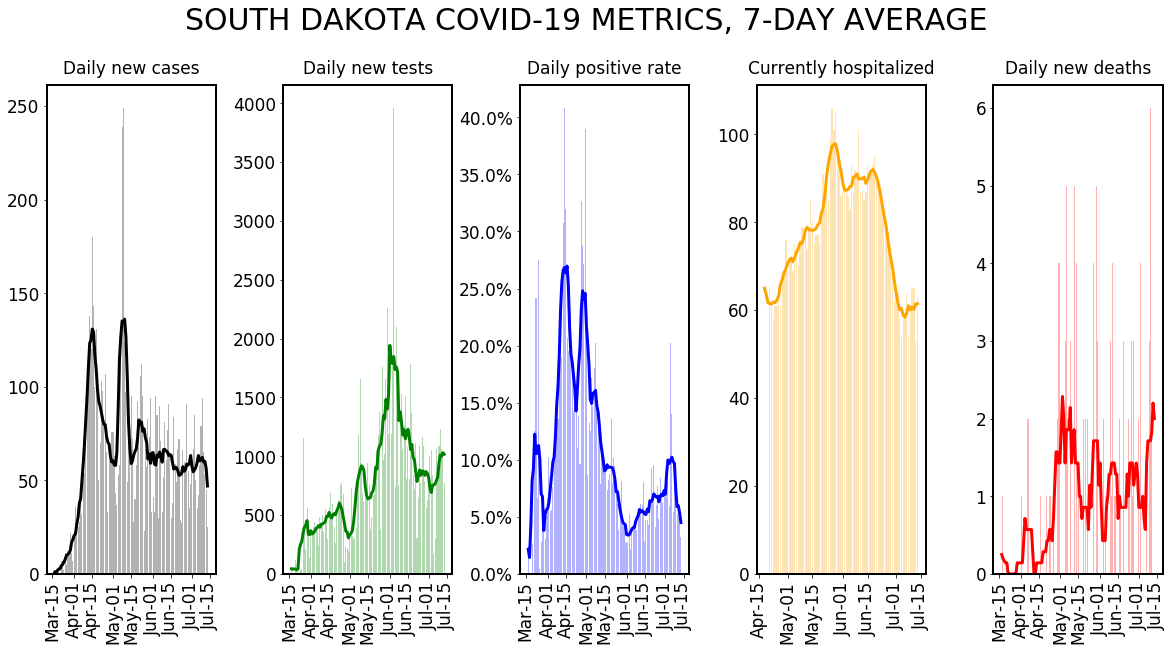

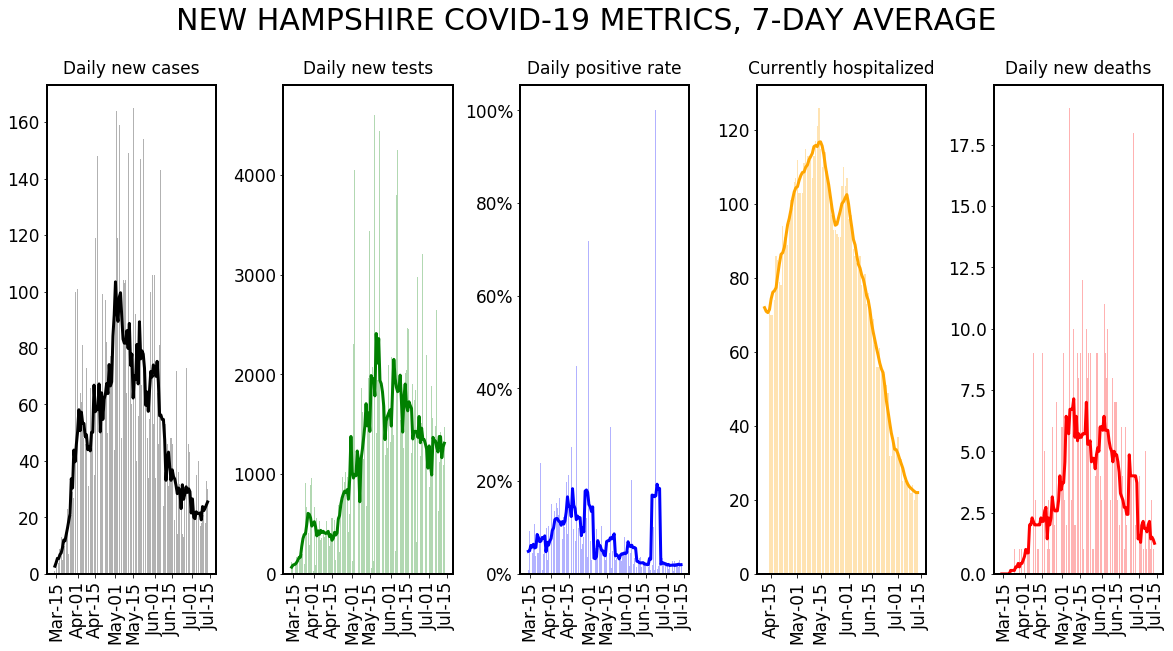

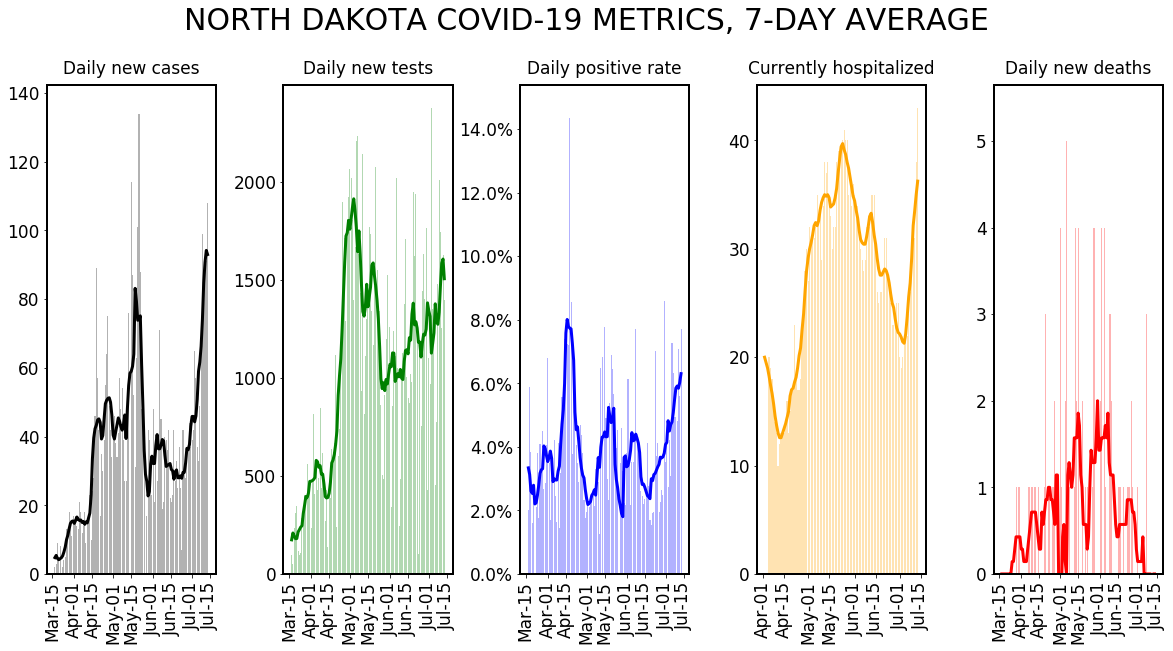

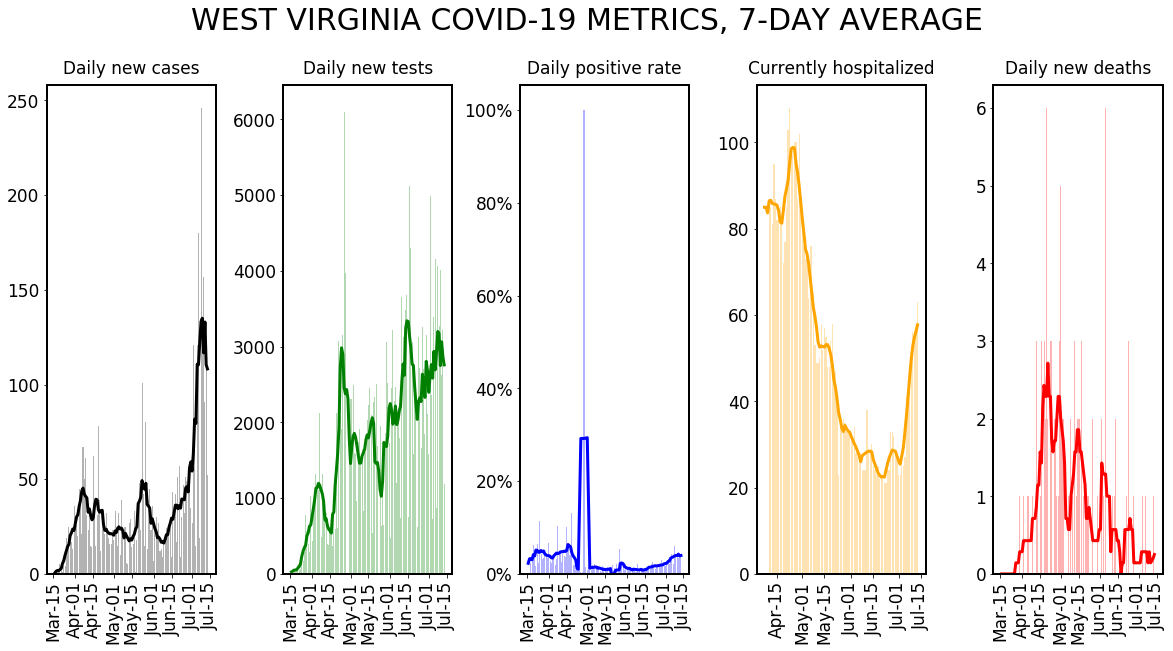

KeyboardInterrupt: 

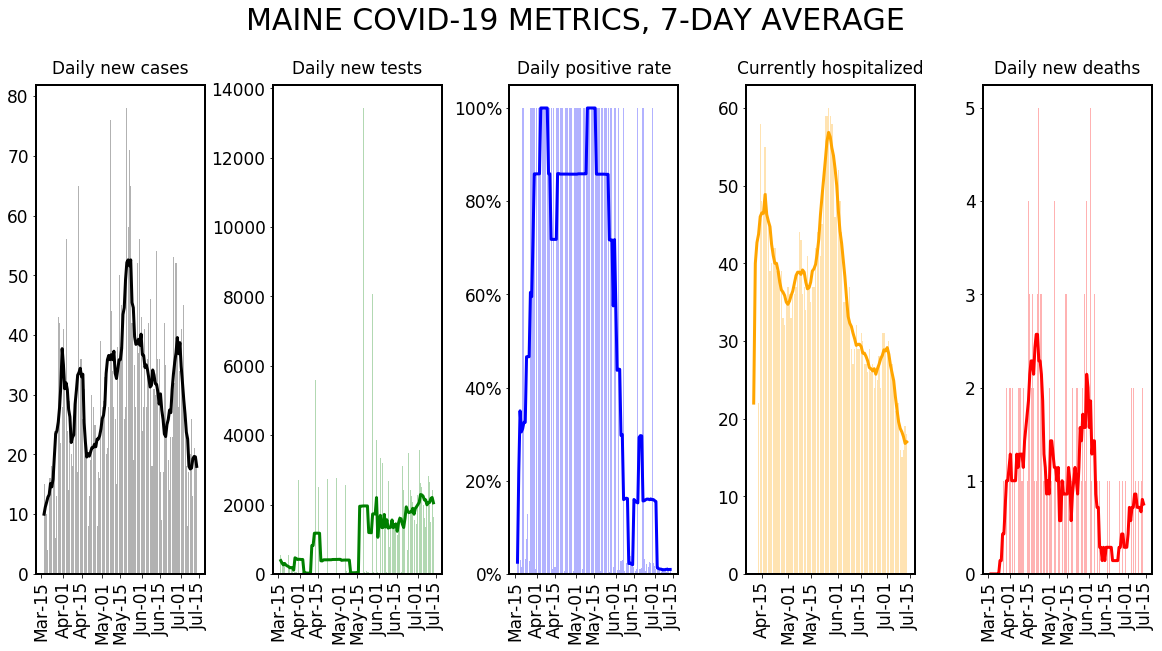

In [60]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    """
    if focus_state == 'AZ':
        pass
    else:
         continue
    """
    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
             }
    state_full_name = str(states[focus_state])
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    #fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax5.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax5.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax5.bar(x=focus.index, height=focus['deathIncrease'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('{} COVID-19 METRICS, 7-DAY AVERAGE'.format(state_full_name.upper()), fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    #ax4.set_xlim(left='03-15', right='today')
    ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()

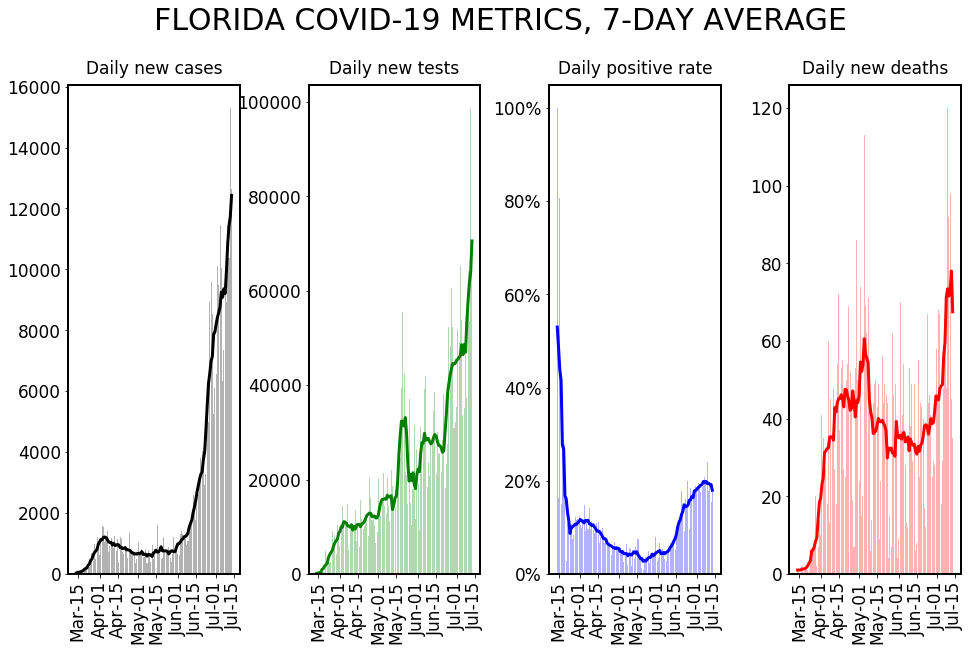

In [52]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    
    if focus_state == 'FL':
        pass
    else:
         continue
    
    
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    offset = 10
    focus =  focus.iloc[:-offset]
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16,9) )
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,9))
    #fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,9) )
    
    
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    
    window = 7
    #ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()
    #ax1.plot(focus.index, focus['average'], linewidth = 5, color = 'black')
    ax1.plot(focus.index, focus['average'], color = 'black', lw=3)
    #ax.scatter(focus.index, focus['positiveIncrease'], c='grey',s=60, label='')
    

    window_2 = 7
    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window_2, min_periods=1, center=True).mean()
    
    window_3 = 7
    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window_3, min_periods=1, center=True).mean()
    
    #plt.fill_between(df.Date.values, df.Data.values)
    window_4 = 7
    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window_4, min_periods=1, center=True).mean()
    
    window_5 =7 
    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window_5, min_periods=1, center=True).mean()
    
    rc('font',weight='light')
    rc('axes', linewidth=2)
    #plt.rcdefaults() 
    #ax2 = ax.twinx()
    #color = 'blue'
    #ax.set_ylabel('Daily new cases (7-day avg)', fontsize=26, fontweight='bold')
    #ax1.set_xlabel('Daily new cases',fontsize=20)
    ax1.set_title('Daily new cases',fontsize=17, y=1.01)
    ax2.set_title('Daily new tests',fontsize=17, y=1.01)
    ax3.set_title('Daily positive rate',fontsize=17, y=1.01)
    #ax4.set_title('Currently hospitalized',fontsize=17, y=1.01)
    ax4.set_title('Daily new deaths',fontsize=17, y=1.01)
    
    #ax1.set_position([.5, 1.05])
    #ax2.set_xlabel('Daily new tests (7-day avg)', color=color, fontsize=26)
    #ax2.set_xlabel('Daily new tests',fontsize=20)
    #ax3.set_xlabel('Daily positive rate',fontsize=20 )
    #ax4.set_xlabel('Currently hospitalized',fontsize=20)
    
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.set_label_position('top')
    ax3.xaxis.set_label_position('top')    
    ax4.xaxis.set_label_position('top')
    #ax5.xaxis.set_label_position('top')
    
    #ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='red')
    #ax2.plot(focus['average_new_tests'], ls=':', lw=5, color=color)
    ax2.plot(focus['average_new_tests'],color='green', lw=3 )
    ax3.plot(focus['average_positivity'],color ='blue', lw=3)
    #ax4.plot(focus['average_hospitalization'],color = 'orange',lw=3)
    ax4.plot(focus['average_death_increase'],color = 'red',lw=3)
    
    ax1.bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    ax2.bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    ax3.bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    #ax4.bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    ax4.bar(x=focus.index, height=focus['deathIncrease'], color ='red',alpha=0.3)
    
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
    fig.suptitle('FLORIDA COVID-19 METRICS, 7-DAY AVERAGE', fontsize=30, y =1)
    ax2.tick_params(axis='y', labelcolor='black')
    ax3.tick_params(axis='y',labelcolor = 'black')
    ax4.tick_params(axis='y',labelcolor = 'black')
    #ax5.tick_params(axis='y',labelcolor = 'black')
    
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.tick_params(labelsize=17)
    ax2.tick_params(labelsize=17)
    ax3.tick_params(labelsize=17)
    ax4.tick_params(labelsize=17)
    #ax5.tick_params(labelsize=17)
    #ax2.tick_params(labelsize=18)
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    ax3.set_ylim(bottom=0)
    ax4.set_ylim(bottom=0)
    #ax5.set_ylim(bottom=0)
    #ax1.tick_params(labelrotation=30)
    #ax2.tick_params(labelrotation=30)
    #ax3.tick_params(labelrotation=30)
    ax1.tick_params(axis='x', labelrotation=90 )
    ax2.tick_params(axis='x', labelrotation=90 )
    ax3.tick_params(axis='x', labelrotation=90 )
    ax4.tick_params(axis='x', labelrotation=90 )
    #ax5.tick_params(axis='x', labelrotation=90 )
    
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax1.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_formatter(date_form)
    ax3.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_formatter(date_form)
    #ax5.xaxis.set_major_formatter(date_form)
    #plt.rcParams['axes.labelsize'] = 16
    #plt.rcParams['axes.labelweight'] = 'bold'
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    # Ensure a major tick for each week using (interval=1) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    #ax.legend([extra],(focus_state,), fontsize=30, frameon=False)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.savefig(r'figures\states\testing_data\hospitalization/%s.png'% (focus_state+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()